# Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve their services so that customers do not renounce their credit cards

# Objective

- Explore and visualize the dataset.
- Build a classification model to predict if the customer is going to churn or not
- Optimize the model using appropriate techniques
- Generate a set of insights and recommendations that will help the bank

# Data Dictionary 

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [1]:
%%time
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import tree
import scipy.stats as stats


# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To impute missing values
from sklearn.impute import KNNImputer

Wall time: 4.38 s


# EDA

## View the dataset

In [2]:
df = pd.read_csv("BankChurners.csv")
data = df.copy() # let us make another copy of data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 10127 rows and 21 columns.


In [3]:
data.head(5) # Exploring first 10 rows of the data set

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [4]:
np.random.seed(42)  # To get the same random results every time
data.sample(n=10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
3781  719455083  Existing Customer            48      F                3   
2922  773503308  Existing Customer            59      M                1   
5070  715452408  Existing Customer            37      F                2   
7246  711264033  Existing Customer            47      M                3   
623   718943508  Existing Customer            42      M                3   
3931  778247358  Existing Customer            65      M                1   
4767  710431158  Existing Customer            52      F                3   
7094  715252383  Existing Customer            58      F                2   
3282  717189183  Existing Customer            35      M                1   
3994  712050933  Attrited Customer            48      M                4   

     Education_Level Marital_Status Income_Category Card_Category  \
3781      Uneducated         Single  Less than $40K          Blue   
2922      Uneducated         Single  Less than $40K          Blue   
5070        Graduate       Divorced  Less than $40K          Blue   
7246       Doctorate       Divorced     $40K - $60K          Blue   
623          Unknown         Single    $80K - $120K          Blue   
3931        Graduate         Single  Less than $40K          Blue   
4767         Unknown         Single         Unknown          Blue   
7094     High School       Divorced         Unknown          Gold   
3282       Doctorate         Single     $40K - $60K          Blue   
3994         College        Married    $80K - $120K          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
3781              39                         4                       3   
2922              53                         5                       5   
5070              36                         4                       3   
7246              36                         4                       2   
623               33                         3                       3   
3931              56                         5                       3   
4767              36                         3                       1   
7094              36                         5                       4   
3282              24                         6                       3   
3994              32                         5                       2   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
3781                      4        2991.0                 1508   
2922                      4        2192.0                 1569   
5070                      3        1734.0                  987   
7246                      3        4786.0                 1516   
623                       2        3714.0                 2170   
3931                      2        7636.0                    0   
4767                      2       10273.0                 1657   
7094                      3       34516.0                 1864   
3282                      2       10467.0                 1961   
3994                      3       25190.0                    0   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3781           1483.0                 0.703             3734              64   
2922            623.0                 0.706             4010              79   
5070            747.0                 0.879             4727              67   
7246           3270.0                 0.940             4973              74   
623            1544.0                 0.524             1454              35   
3931           7636.0                 0.801             3880              67   
4767           8616.0                 0.710             3778              70   
7094          32652.0                 0.664             3595              52   
3282           8506.0                 0.713             2665              65   
3994          25190.0                 0.467             1533       

In [5]:
np.random.seed(1)  # To get the same random results every time
data.sample(n=10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
6498  712389108  Existing Customer            43      F                2   
9013  718388733  Existing Customer            38      F                1   
2053  710109633  Existing Customer            39      M                2   
3211  717331758  Existing Customer            44      M                4   
5559  709460883  Attrited Customer            38      F                2   
6106  789105183  Existing Customer            54      M                3   
4150  771342183  Attrited Customer            53      F                3   
2205  708174708  Existing Customer            38      M                4   
4145  718076733  Existing Customer            43      M                1   
5324  821889858  Attrited Customer            50      F                1   

     Education_Level Marital_Status Income_Category Card_Category  \
6498        Graduate        Married  Less than $40K          Blue   
9013         College        Unknown  Less than $40K          Blue   
2053         College        Married     $60K - $80K          Blue   
3211        Graduate        Married         $120K +          Blue   
5559       Doctorate        Married  Less than $40K          Blue   
6106   Post-Graduate         Single    $80K - $120K        Silver   
4150        Graduate         Single     $40K - $60K          Blue   
2205        Graduate        Married     $40K - $60K          Blue   
4145        Graduate         Single     $60K - $80K        Silver   
5324       Doctorate         Single         Unknown          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
6498              36                         6                       3   
9013              32                         2                       3   
2053              31                         6                       3   
3211              32                         6                       3   
5559              28                         5                       2   
6106              42                         3                       1   
4150              40                         6                       3   
2205              27                         6                       2   
4145              31                         4                       3   
5324              46                         6                       4   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
6498                      2        2570.0                 2107   
9013                      3        2609.0                 1259   
2053                      2        9871.0                 1061   
3211                      4       34516.0                 2517   
5559                      4        1614.0                    0   
6106                      2       34516.0                 2488   
4150                      2        1625.0                    0   
2205                      4        5535.0                 1276   
4145                      3       25824.0                 1170   
5324                      3        1970.0                 1477   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6498            463.0                 0.651             4058              83   
9013           1350.0                 0.871             8677              96   
2053           8810.0                 0.545             1683              34   
3211          31999.0                 0.765             4228              83   
5559           1614.0                 0.609             2437              46   
6106          32028.0                 0.552             4401              87   
4150           1625.0                 0.689             2314              43   
2205           4259.0                 0.636             1764              38   
4145          24654.0                 0.684             3101              73   
5324            493.0                 0.662             2493       

In [6]:
data.tail(5) # Exploring last 10 rows of the data set

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Observations**
- There are total 21 columns and 10127 observations in the dataset.
- We can see that no columns have less than 10127 non-null values i.e. no missing values.

In [8]:
(data.isnull() | data.eq('')).values.any() # If there are any null or missing values in data set; 

# Pandas will recognize both empty cells and “NA” types as missing values
# To detect NaN values numpy uses np.isnan().
# To detect NaN values pandas uses either .isna() or .isnull().
# The NaN values are inherited from the fact that pandas is built on top of numpy, 
# while the two functions' names originate from R's DataFrames, whose structure and functionality pandas tried to mimic.

False

**Observations**
- Confirmed no missing values in dataset.

In [9]:
# Check the unique value counts in each column of the dataframe.
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

**Observations**
- We can drop the column - CLIENTNUM as it is unique for each customer and will not add value to the model.
- Variables that are categorical have unique values lower than count of 10 in this dataset.

In [10]:
data.drop(["CLIENTNUM"],axis=1,inplace=True) # Remove CLIENTNUM column and use python #no. ; inplace means no make copy

In [11]:
data[data.duplicated()].count() # Find out duplicates in the data set

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

**Observations**
- There are no duplicate entries.

In [12]:
# Viewing possible categorical variable values
cat_cols=['Attrition_Flag','Gender','Dependent_count','Education_Level','Marital_Status','Income_Category','Card_Category',
         'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
---------------

**Observations**
- Education_Level has an unknown class (~15%)
- Marital_Status has an unknown class (~7.4%)
- Income_Category has an unknown class (~11%)
- Income_Category requires variable value formats to be corrected to be consistent
- Attrition_Flag requires variable values to be changed to 1s for Attrited Customer and 0s for Existing Customer

## Correcting Variable Values

### Income_Category

In [13]:
# Stripping empty string values
data["Income_Category"] = data["Income_Category"].str.strip()

In [14]:
# Correcting Income_Category variable values
data["Income_Category"].replace("Less than $40K", "Less than 40k", inplace=True)
data["Income_Category"].replace("$40K - $60K", "40k-60k", inplace=True)
data["Income_Category"].replace("$60K - $80K","60k-80k", inplace=True)
data["Income_Category"].replace("$80K - $120K","80k-120k", inplace=True)
data["Income_Category"].replace("$120K +","More than 120k", inplace=True)

In [15]:
# Income_Category variable values corrected
print(data["Income_Category"].value_counts())

Less than 40k     3561
40k-60k           1790
80k-120k          1535
60k-80k           1402
Unknown           1112
More than 120k     727
Name: Income_Category, dtype: int64


### Attrition_Flag

In [16]:
# Stripping empty string values
data["Attrition_Flag"] = data["Attrition_Flag"].str.strip()

In [17]:
# Correcting Attrition_Flag variable values
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True) # '0' flag for existing customer
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True) # '1' flag for attrited customer

In [18]:
# Attrition_Flag variable values corrected
print(data["Attrition_Flag"].value_counts())

0    8500
1    1627
Name: Attrition_Flag, dtype: int64


### Variable Datatype Conversion

In [19]:
#Converting the data type of each categorical variable to 'category'
for column in cat_cols:
    data[column]=data[column].astype('category')

## Summary of the dataset

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [21]:
#data.describe(include='all').T # View summary of dataset
data.describe().T # View summary of dataset numerical variables

count         mean          std     min       25%  \
Customer_Age           10127.0    46.325960     8.016814    26.0    41.000   
Months_on_book         10127.0    35.928409     7.986416    13.0    31.000   
Credit_Limit           10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal    10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy        10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1   10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt        10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct         10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1    10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio  10127.0     0.274894     0.275691     0.0     0.023   

                            50%        75%        max  
Customer_Age             46.000     52.000     73.000  
Months_on_book           36.000     40.000     56.000  
Credit_Limit           4549.000  11067.500  34516.000  
Total_Revolving_Bal    1276.000   1784.000   2517.000  
Avg_Open_To_Buy        3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1      0.736      0.859      3.397  
Total_Trans_Amt        3899.000   4741.000  18484.000  
Total_Trans_Ct           67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1       0.702      0.818      3.714  
Avg_Utilization_Ratio     0.176      0.503      0.999

**Observations**
- Customer_Age has a normal distribution with equal mean and median.
- Months_on_book has a rough normal distribution with close mean and median.
- Credit_limit is skewed to the right with mean much higher than median meaning majority customers have lower credit limit than the mean and outliers on the higher end.
- Total_Revolving_Bal is just slightly left skewed and can be considered quite close to normal distribution.
- Avg_Open_To_Buy skewed to the right with mean much higher than median meaning majority customers have lower Avg_Open_To_Buy than the mean and outliers on the higher end in small numbers. 
- Total_Amt_Chng_Q4_Q1 skewed to the right with mean slightly higher and can be considered quite close to normal distribution with outliers on both ends.
- Total_Trans_Amt is right skewed with much higher outliers on the higher end.
- Total_Trans_Ct is roughly normal distributed.
- Total_Ct_Chng_Q4_Q1 is roughly normal distributed. 
- Avg_Utilization_Ratio is right skewed.

In [22]:
data.describe(include=['category']).T # View summary of dataset categorical variables

count unique            top  freq
Attrition_Flag            10127      2              0  8500
Gender                    10127      2              F  5358
Dependent_count           10127      6              3  2732
Education_Level           10127      7       Graduate  3128
Marital_Status            10127      4        Married  4687
Income_Category           10127      6  Less than 40k  3561
Card_Category             10127      4           Blue  9436
Total_Relationship_Count  10127      6              3  2305
Months_Inactive_12_mon    10127      7              3  3846
Contacts_Count_12_mon     10127      7              3  3380

**Observations**
- 83.9% are still with the bank, the target variable is imbalanced.
- 52.9% are female.
- 27.0% have 3 dependents, forming the largest group.
- 30.9% are graduates.
- 46.3% are married.
- 35.2% are earning less the 40K income.
- 93.2% are blue card holders.
- 22.8% have 3 products with the bank.
- 38.0% are 3 months inactive for the last year with the bank.
- 33.4% have 3 contacts with the bank in the last year.

## Univariate Analysis

In [23]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(7,5), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

### Observations on Customer_Age (Start of Numerical Variables Analysis)

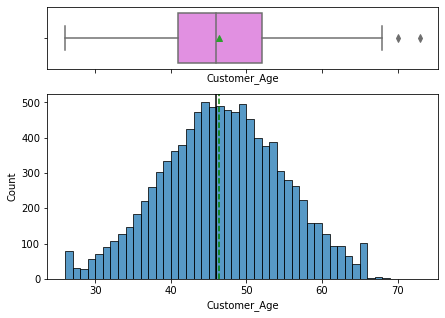

In [25]:
histogram_boxplot(data['Customer_Age'])

In [26]:
#Finding Upper and lower whisker values
upper_quartile = np.percentile(data.Customer_Age, 75)
lower_quartile = np.percentile(data.Customer_Age, 25)
iqr = upper_quartile - lower_quartile
upper_whisker = data.Customer_Age[data.Customer_Age<=upper_quartile+1.5*iqr].max()
lower_whisker = data.Customer_Age[data.Customer_Age>=lower_quartile-1.5*iqr].min()
display(upper_whisker)

68

In [27]:
# Outlier Rows
data[data.Customer_Age >68]

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
251              0            73      M               0     High School   
254              0            70      M               0     High School   

    Marital_Status Income_Category Card_Category  Months_on_book  \
251        Married         40k-60k          Blue              36   
254        Married   Less than 40k          Blue              56   

    Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
251                        5                      3                     2   
254                        3                      2                     3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
251        4469.0                 1125           3344.0                 1.363   
254        3252.0                 1495           1757.0                 0.581   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
251             1765              34                1.615   
254             1227              15                0.875   

     Avg_Utilization_Ratio  
251                  0.252  
254                  0.460

**Observations**
- Customer_Age has a normal distribution with equal mean and median and a very low number of outliers.

### Observations on Months_on_book

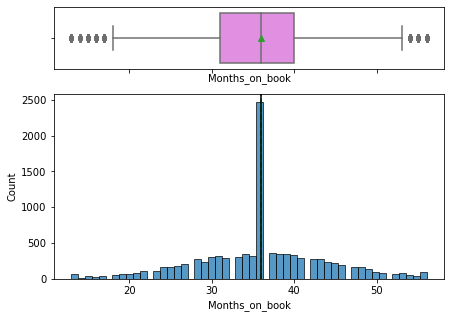

In [28]:
histogram_boxplot(data['Months_on_book'])

In [29]:
display((data.Months_on_book == 36.0).value_counts())

False    7664
True     2463
Name: Months_on_book, dtype: int64

In [30]:
#Finding Upper and lower whisker values
upper_quartile = np.percentile(data.Months_on_book, 75)
lower_quartile = np.percentile(data.Months_on_book, 25)
iqr = upper_quartile - lower_quartile
upper_whisker = data.Months_on_book[data.Months_on_book<=upper_quartile+1.5*iqr].max()
lower_whisker = data.Months_on_book[data.Months_on_book>=lower_quartile-1.5*iqr].min()
display(upper_whisker)
display(lower_whisker)

53

18

In [31]:
# Outlier Rows
data[(data.Months_on_book<18.0) | (data.Months_on_book>53.0)]

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
11                 0            65      M               1         Unknown   
18                 0            61      M               1     High School   
27                 0            63      M               1         Unknown   
39                 1            66      F               0       Doctorate   
52                 0            66      F               0     High School   
...              ...           ...    ...             ...             ...   
10054              1            33      F               1       Doctorate   
10062              0            29      M               2         College   
10069              0            31      M               2        Graduate   
10107              1            61      M               0        Graduate   
10114              0            29      M               0        Graduate   

      Marital_Status Income_Category Card_Category  Months_on_book  \
11           Married         40k-60k          Blue              54   
18           Married         40k-60k          Blue              56   
27           Married         60k-80k          Blue              56   
39           Married         Unknown          Blue              56   
52           Married   Less than 40k          Blue              54   
...              ...             ...           ...             ...   
10054         Single   Less than 40k          Blue              15   
10062        Married         40k-60k          Blue              17   
10069         Single   Less than 40k          Blue              14   
10107         Single         60k-80k          Blue              54   
10114        Married   Less than 40k          Blue              15   

      Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
11                           6                      2                     3   
18                           2                      2                     3   
27                           3                      3                     2   
39                           5                      4                     3   
52                           3                      4                     2   
...                        ...                    ...                   ...   
10054                        1                      1                     3   
10062                        3                      1                     3   
10069                        4                      3                     3   
10107                        2                      1                     4   
10114                        3                      1                     5   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
11           9095.0                 1587           7508.0   
18           3193.0                 2517            676.0   
27          10215.0                 1010           9205.0   
39           7882.0                  605           7277.0   
52           3171.0                 2179            992.0   
...             ...                  ...              ...   
10054        3709.0                 1180           2529.0   
10062        4626.0                 1232           3394.0   
10069        6933.0                 1870           5063.0   
10107       11859.0                 1644          10215.0   
10114        4700.0                    0           4700.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
11                    1.433             1314              26   
18                    1.831             1336              30   
27                    0.843             1904              40   
39                    1.052              704              16   
52                    1.224             1946              38   
...                     ...              ...             ...   
10054                 0.645             8130              74   
10062                 0.731            14740  

**Observations**
- Months_on_book has a normal distribution with 24.3% of customers (2463) having 36 months with the bank, likely a mass sign up from a promotion 3 years ago.
- 3.8% of observations are outliers.

### Observations on Credit_Limit

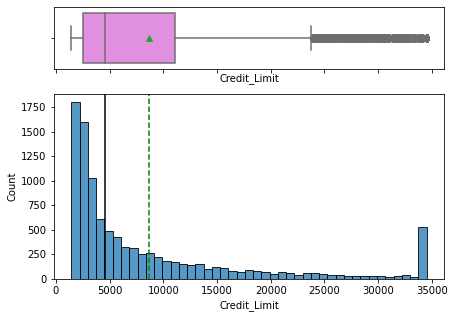

In [32]:
histogram_boxplot(data['Credit_Limit'])

In [33]:
#Finding Upper and lower whisker values
upper_quartile = np.percentile(data.Credit_Limit, 75)
lower_quartile = np.percentile(data.Credit_Limit, 25)
iqr = upper_quartile - lower_quartile
upper_whisker = data.Credit_Limit[data.Credit_Limit<=upper_quartile+1.5*iqr].max()
lower_whisker = data.Credit_Limit[data.Credit_Limit>=lower_quartile-1.5*iqr].min()
display(upper_whisker)
display(lower_whisker)

23760.0

1438.3

In [34]:
# Outlier Rows
data[data.Credit_Limit >23760.0]

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
6                  0            51      M               4         Unknown   
7                  0            32      M               0     High School   
16                 0            48      M               4   Post-Graduate   
40                 0            45      M               3        Graduate   
45                 0            49      M               4      Uneducated   
...              ...           ...    ...             ...             ...   
10098              1            55      M               3        Graduate   
10100              0            39      M               2        Graduate   
10104              0            51      M               3        Graduate   
10110              0            56      M               1        Graduate   
10112              1            33      M               2         College   

      Marital_Status Income_Category Card_Category  Months_on_book  \
6            Married  More than 120k          Gold              46   
7            Unknown         60k-80k        Silver              27   
16            Single        80k-120k          Blue              36   
40            Single        80k-120k          Blue              41   
45            Single        80k-120k          Blue              30   
...              ...             ...           ...             ...   
10098         Single  More than 120k        Silver              36   
10100        Unknown         60k-80k        Silver              36   
10104         Single         60k-80k        Silver              36   
10110         Single        80k-120k        Silver              49   
10112        Married  More than 120k          Gold              20   

      Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
6                            6                      1                     3   
7                            2                      2                     2   
16                           6                      2                     3   
40                           2                      2                     2   
45                           3                      2                     3   
...                        ...                    ...                   ...   
10098                        4                      3                     4   
10100                        4                      2                     2   
10104                        3                      2                     2   
10110                        5                      2                     2   
10112                        2                      1                     4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
6           34516.0                 2264          32252.0   
7           29081.0                 1396          27685.0   
16          30367.0                 2362          28005.0   
40          32426.0                  578          31848.0   
45          34516.0                    0          34516.0   
...             ...                  ...              ...   
10098       34516.0                    0          34516.0   
10100       29808.0                    0          29808.0   
10104       29663.0                 1743          27920.0   
10110       34516.0                 1091          33425.0   
10112       34516.0                    0          34516.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6                     1.975             1330              31   
7                     2.204             1538              36   
16                    1.708             1671              27   
40                    1.042             1109              28   
45                    1.621             1444              28   
...                     ...              ...             ...   
10098                 1.007             9931              70   
10100                 0.669            16098  

In [35]:
# Outlier Rows
data[data.Credit_Limit >34000.0]

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
6                  0            51      M               4         Unknown   
45                 0            49      M               4      Uneducated   
61                 1            48      M               2        Graduate   
65                 0            51      M               4      Uneducated   
70                 0            51      M               4        Graduate   
...              ...           ...    ...             ...             ...   
10088              0            45      M               2        Graduate   
10095              0            46      M               3         Unknown   
10098              1            55      M               3        Graduate   
10110              0            56      M               1        Graduate   
10112              1            33      M               2         College   

      Marital_Status Income_Category Card_Category  Months_on_book  \
6            Married  More than 120k          Gold              46   
45            Single        80k-120k          Blue              30   
61           Married         60k-80k        Silver              35   
65            Single        80k-120k        Silver              38   
70            Single  More than 120k          Blue              42   
...              ...             ...           ...             ...   
10088         Single         60k-80k        Silver              33   
10095        Married        80k-120k          Blue              33   
10098         Single  More than 120k        Silver              36   
10110         Single        80k-120k        Silver              49   
10112        Married  More than 120k          Gold              20   

      Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
6                            6                      1                     3   
45                           3                      2                     3   
61                           2                      4                     4   
65                           4                      1                     4   
70                           3                      2                     3   
...                        ...                    ...                   ...   
10088                        4                      2                     2   
10095                        4                      1                     3   
10098                        4                      3                     4   
10110                        5                      2                     2   
10112                        2                      1                     4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
6           34516.0                 2264          32252.0   
45          34516.0                    0          34516.0   
61          34516.0                    0          34516.0   
65          34516.0                 1515          33001.0   
70          34516.0                 1763          32753.0   
...             ...                  ...              ...   
10088       34516.0                 1529          32987.0   
10095       34516.0                 1099          33417.0   
10098       34516.0                    0          34516.0   
10110       34516.0                 1091          33425.0   
10112       34516.0                    0          34516.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6                     1.975             1330              31   
45                    1.621             1444              28   
61                    0.763              691              15   
65                    0.592             1293              32   
70                    1.266             1550              41   
...                     ...              ...             ...   
10088                 0.609            13940             105   
10095                 0.816            15490  

**Observations**
- Credit_limit is skewed to the right with majority customers having lower credit limit than the mean and outliers on the higher end constituting 9.7% of customers.
- Credit_limit numbers at 34516.0 appear to be wrong records as the number of rows are pretty high and their values are suspiciously the same. These constitues 5.1% of customer records.These errorneous records could be dropped with minimal impact.

### Observations on Avg_Open_To_Buy

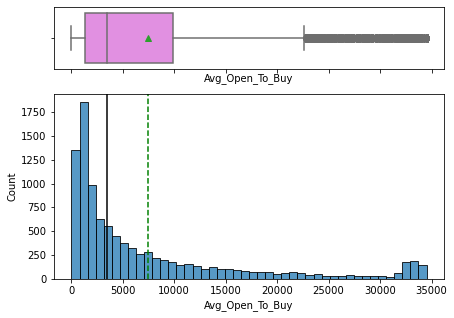

In [36]:
histogram_boxplot(data['Avg_Open_To_Buy'])

In [37]:
#Finding Upper and lower whisker values
upper_quartile = np.percentile(data.Avg_Open_To_Buy, 75)
lower_quartile = np.percentile(data.Avg_Open_To_Buy, 25)
iqr = upper_quartile - lower_quartile
upper_whisker = data.Avg_Open_To_Buy[data.Avg_Open_To_Buy<=upper_quartile+1.5*iqr].max()
lower_whisker = data.Avg_Open_To_Buy[data.Avg_Open_To_Buy>=lower_quartile-1.5*iqr].min()
display(upper_whisker)
display(lower_whisker)

22616.0

3.0

In [38]:
# Outlier Rows
data[data.Avg_Open_To_Buy >22616.0]

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
6                  0            51      M               4         Unknown   
7                  0            32      M               0     High School   
16                 0            48      M               4   Post-Graduate   
40                 0            45      M               3        Graduate   
45                 0            49      M               4      Uneducated   
...              ...           ...    ...             ...             ...   
10100              0            39      M               2        Graduate   
10103              1            51      M               1     High School   
10104              0            51      M               3        Graduate   
10110              0            56      M               1        Graduate   
10112              1            33      M               2         College   

      Marital_Status Income_Category Card_Category  Months_on_book  \
6            Married  More than 120k          Gold              46   
7            Unknown         60k-80k        Silver              27   
16            Single        80k-120k          Blue              36   
40            Single        80k-120k          Blue              41   
45            Single        80k-120k          Blue              30   
...              ...             ...           ...             ...   
10100        Unknown         60k-80k        Silver              36   
10103        Married        80k-120k          Blue              36   
10104         Single         60k-80k        Silver              36   
10110         Single        80k-120k        Silver              49   
10112        Married  More than 120k          Gold              20   

      Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
6                            6                      1                     3   
7                            2                      2                     2   
16                           6                      2                     3   
40                           2                      2                     2   
45                           3                      2                     3   
...                        ...                    ...                   ...   
10100                        4                      2                     2   
10103                        4                      3                     4   
10104                        3                      2                     2   
10110                        5                      2                     2   
10112                        2                      1                     4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
6           34516.0                 2264          32252.0   
7           29081.0                 1396          27685.0   
16          30367.0                 2362          28005.0   
40          32426.0                  578          31848.0   
45          34516.0                    0          34516.0   
...             ...                  ...              ...   
10100       29808.0                    0          29808.0   
10103       22754.0                    0          22754.0   
10104       29663.0                 1743          27920.0   
10110       34516.0                 1091          33425.0   
10112       34516.0                    0          34516.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6                     1.975             1330              31   
7                     2.204             1538              36   
16                    1.708             1671              27   
40                    1.042             1109              28   
45                    1.621             1444              28   
...                     ...              ...             ...   
10100                 0.669            16098             128   
10103                 0.799             8531  

**Observations**
- Avg_Open_To_Buy skewed to the right with majority of customers have lower Avg_Open_To_Buy than the mean and outliers on the higher end constituting 9.5% of customers.

### Observations on Total_Trans_Amt

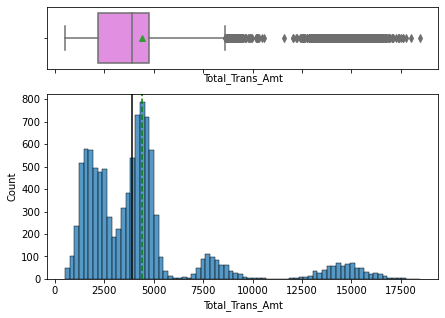

In [39]:
histogram_boxplot(data['Total_Trans_Amt'])

In [40]:
#Finding Upper and lower whisker values
upper_quartile = np.percentile(data.Total_Trans_Amt, 75)
lower_quartile = np.percentile(data.Total_Trans_Amt, 25)
iqr = upper_quartile - lower_quartile
upper_whisker = data.Total_Trans_Amt[data.Total_Trans_Amt<=upper_quartile+1.5*iqr].max()
lower_whisker = data.Total_Trans_Amt[data.Total_Trans_Amt>=lower_quartile-1.5*iqr].min()
display(upper_whisker)
display(lower_whisker)

8618

510

In [41]:
# Outlier Rows
data[data.Total_Trans_Amt >8618]

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
8591               0            50      M               3     High School   
8650               0            43      F               2         College   
8670               0            39      F               4       Doctorate   
8708               0            51      F               2         Unknown   
8734               0            45      M               5         Unknown   
...              ...           ...    ...             ...             ...   
10121              0            56      F               1        Graduate   
10122              0            50      M               2        Graduate   
10123              1            41      M               2         Unknown   
10124              1            44      F               1     High School   
10126              1            43      F               2        Graduate   

      Marital_Status Income_Category Card_Category  Months_on_book  \
8591          Single        80k-120k          Blue              39   
8650         Married   Less than 40k          Blue              37   
8670         Married   Less than 40k          Blue              27   
8708         Married         40k-60k          Blue              36   
8734         Married         60k-80k          Blue              38   
...              ...             ...           ...             ...   
10121         Single   Less than 40k          Blue              50   
10122         Single         40k-60k          Blue              40   
10123       Divorced         40k-60k          Blue              25   
10124        Married   Less than 40k          Blue              36   
10126        Married   Less than 40k        Silver              25   

      Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
8591                         3                      3                     2   
8650                         3                      3                     1   
8670                         2                      1                     1   
8708                         2                      2                     1   
8734                         1                      2                     3   
...                        ...                    ...                   ...   
10121                        4                      1                     4   
10122                        3                      2                     3   
10123                        4                      2                     3   
10124                        5                      3                     4   
10126                        6                      2                     4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
8591        21322.0                 2216          19106.0   
8650         5380.0                 1337           4043.0   
8670         8587.0                 1324           7263.0   
8708        14800.0                 1020          13780.0   
8734         6895.0                 2314           4581.0   
...             ...                  ...              ...   
10121        3688.0                  606           3082.0   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
8591                  0.921             8693              91   
8650                  0.845             8947              93   
8670                  0.897             8854              92   
8708                  0.896             8796              94   
8734                  0.840             8778              85   
...                     ...              ...             ...   
10121                 0.570            14596             120   
10122                 0.703            15476  

**Observations**
- Total_Trans_Amt is right skewed with much higher outliers on the higher end. These outliers make up 8.8% of customers.

### Observations on Total_Trans_Ct

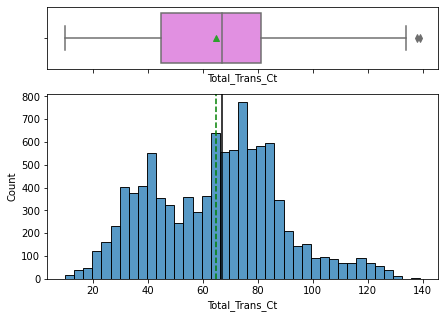

In [42]:
histogram_boxplot(data['Total_Trans_Ct'])

In [43]:
#Finding Upper and lower whisker values
upper_quartile = np.percentile(data.Total_Trans_Ct, 75)
lower_quartile = np.percentile(data.Total_Trans_Ct, 25)
iqr = upper_quartile - lower_quartile
upper_whisker = data.Total_Trans_Ct[data.Total_Trans_Ct<=upper_quartile+1.5*iqr].max()
lower_whisker = data.Total_Trans_Ct[data.Total_Trans_Ct>=lower_quartile-1.5*iqr].min()
display(upper_whisker)
display(lower_whisker)

134

10

In [44]:
# Outlier Rows
data[data.Total_Trans_Ct >134.0]

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
9324              0            41      M               3         Unknown   
9586              0            56      F               1     High School   

     Marital_Status Income_Category Card_Category  Months_on_book  \
9324        Married  More than 120k          Blue              33   
9586        Married         Unknown          Blue              49   

     Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
9324                        2                      4                     3   
9586                        1                      2                     1   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9324       34516.0                  638          33878.0   
9586       17542.0                 2517          15025.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9324                 0.724            13085             139   
9586                 0.800            13939             138   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
9324                0.675                  0.018  
9586                0.792                  0.143

**Observations**
- Total_Trans_Ct is roughly normal distributed with 2 outlier observations.

### Observations on Total_Revolving_Bal

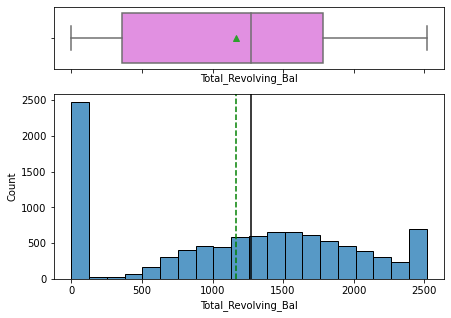

In [45]:
histogram_boxplot(data['Total_Revolving_Bal'])

In [46]:
#data[data.Total_Revolving_Bal < 125.0]
data.Total_Revolving_Bal.value_counts().sort_values()

204        1
1011       1
2131       1
471        1
463        1
        ... 
1720      11
1480      12
1965      12
2517     508
0       2470
Name: Total_Revolving_Bal, Length: 1974, dtype: int64

**Observations**
- The distribution is largely normal with 24.4% of customers (2470) with no revolving balance on the cards.
- There are no outliers.

### Observations on Avg_Utilization_Ratio

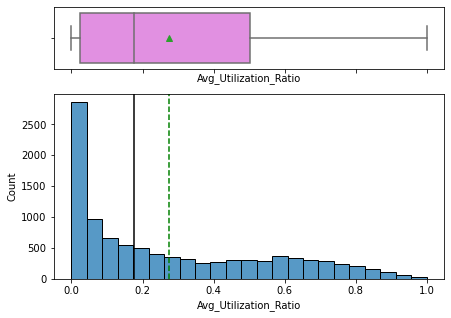

In [47]:
histogram_boxplot(data['Avg_Utilization_Ratio'])

In [48]:
round(data.Avg_Utilization_Ratio.mean(),2)

0.27

**Observations**
- Avg_Utilization_Ratio is right skewed with majority of customers below the mean of 0.27.
- There are no outliers.

### Observations on Total_Ct_Chng_Q4_Q1

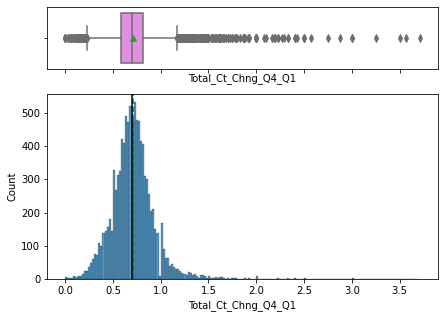

In [49]:
histogram_boxplot(data['Total_Ct_Chng_Q4_Q1'])

In [50]:
#Finding Upper and lower whisker values
upper_quartile = np.percentile(data.Total_Ct_Chng_Q4_Q1, 75)
lower_quartile = np.percentile(data.Total_Ct_Chng_Q4_Q1, 25)
iqr = upper_quartile - lower_quartile
upper_whisker = data.Total_Ct_Chng_Q4_Q1[data.Total_Ct_Chng_Q4_Q1<=upper_quartile+1.5*iqr].max()
lower_whisker = data.Total_Ct_Chng_Q4_Q1[data.Total_Ct_Chng_Q4_Q1>=lower_quartile-1.5*iqr].min()
display(upper_whisker)
display(lower_whisker)

1.171

0.231

In [51]:
# Outlier Rows
data[(data.Total_Ct_Chng_Q4_Q1<0.231) | (data.Total_Ct_Chng_Q4_Q1>1.171)]

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
0                 0            45      M               3     High School   
1                 0            49      F               5        Graduate   
2                 0            51      M               3        Graduate   
3                 0            40      F               4     High School   
4                 0            40      M               3      Uneducated   
...             ...           ...    ...             ...             ...   
9388              1            40      F               2         College   
9672              1            60      M               1     High School   
9856              1            44      M               4      Uneducated   
9917              1            40      M               2         Unknown   
9977              1            41      F               3      Uneducated   

     Marital_Status Income_Category Card_Category  Months_on_book  \
0           Married         60k-80k          Blue              39   
1            Single   Less than 40k          Blue              44   
2           Married        80k-120k          Blue              36   
3           Unknown   Less than 40k          Blue              34   
4           Married         60k-80k          Blue              21   
...             ...             ...           ...             ...   
9388         Single   Less than 40k          Blue              36   
9672         Single   Less than 40k          Blue              50   
9856        Married         60k-80k        Silver              37   
9917         Single         60k-80k          Blue              20   
9977        Married   Less than 40k          Blue              30   

     Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
0                           5                      1                     3   
1                           6                      1                     2   
2                           4                      1                     0   
3                           3                      4                     1   
4                           5                      1                     0   
...                       ...                    ...                   ...   
9388                        4                      2                     3   
9672                        4                      4                     5   
9856                        1                      2                     2   
9917                        4                      2                     4   
9977                        1                      2                     3   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0          12691.0                  777          11914.0   
1           8256.0                  864           7392.0   
2           3418.0                    0           3418.0   
3           3313.0                 2517            796.0   
4           4716.0                    0           4716.0   
...            ...                  ...              ...   
9388        5989.0                    0           5989.0   
9672        4613.0                    0           4613.0   
9856       29076.0                    0          29076.0   
9917        4283.0                    0           4283.0   
9977        9491.0                    0           9491.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                    1.335             1144              42   
1                    1.541             1291              33   
2                    2.594             1887              20   
3                    1.405             1171              20   
4                    2.175              816              28   
...                    ...              ...             ...   
9388                 0.311             5843              60   
9672                 0.978             8970              78   
9856                 0.770            

**Observations**
- Total_Ct_Chng_Q4_Q1 is roughly normal distributed with outliers constituting 3.9% of customers.

### Observations on Total_Amt_Chng_Q4_Q1

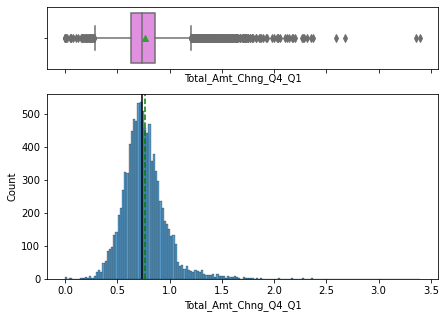

In [52]:
histogram_boxplot(data['Total_Amt_Chng_Q4_Q1'])

In [53]:
#Finding Upper and lower whisker values
upper_quartile = np.percentile(data.Total_Amt_Chng_Q4_Q1, 75)
lower_quartile = np.percentile(data.Total_Amt_Chng_Q4_Q1, 25)
iqr = upper_quartile - lower_quartile
upper_whisker = data.Total_Amt_Chng_Q4_Q1[data.Total_Amt_Chng_Q4_Q1<=upper_quartile+1.5*iqr].max()
lower_whisker = data.Total_Amt_Chng_Q4_Q1[data.Total_Amt_Chng_Q4_Q1>=lower_quartile-1.5*iqr].min()
display(upper_whisker)
display(lower_whisker)

1.2009999999999998

0.289

In [54]:
# Outlier Rows
data[(data.Total_Amt_Chng_Q4_Q1<0.289) | (data.Total_Amt_Chng_Q4_Q1>1.2009999999999998)]

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
0                  0            45      M               3     High School   
1                  0            49      F               5        Graduate   
2                  0            51      M               3        Graduate   
3                  0            40      F               4     High School   
4                  0            40      M               3      Uneducated   
...              ...           ...    ...             ...             ...   
9793               1            42      F               2        Graduate   
9808               1            34      M               0        Graduate   
9963               1            48      M               3     High School   
10008              1            50      M               2         Unknown   
10119              1            55      F               3      Uneducated   

      Marital_Status Income_Category Card_Category  Months_on_book  \
0            Married         60k-80k          Blue              39   
1             Single   Less than 40k          Blue              44   
2            Married        80k-120k          Blue              36   
3            Unknown   Less than 40k          Blue              34   
4            Married         60k-80k          Blue              21   
...              ...             ...           ...             ...   
9793          Single         40k-60k        Silver              32   
9808        Divorced        80k-120k        Silver              24   
9963         Married         60k-80k          Blue              36   
10008        Married  More than 120k          Blue              36   
10119         Single         Unknown          Blue              47   

      Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
0                            5                      1                     3   
1                            6                      1                     2   
2                            4                      1                     0   
3                            3                      4                     1   
4                            5                      1                     0   
...                        ...                    ...                   ...   
9793                         4                      3                     3   
9808                         1                      2                     3   
9963                         1                      2                     5   
10008                        6                      2                     2   
10119                        4                      3                     3   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
9793        17909.0                    0          17909.0   
9808        34516.0                  400          34116.0   
9963         8431.0                    0           8431.0   
10008       16081.0                  492          15589.0   
10119       14657.0                 2517          12140.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
9793                  0.225             5977              58   
9808                  0.202             5112  

**Observations**
- Total_Amt_Chng_Q4_Q1 has normal distribution with outliers on both ends constituting 3.9% of customers.

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

### Observations on Attrition_Flag (Start of Categorical Variables Analysis)

In [56]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(10,5)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
    plt.show() # show the plot

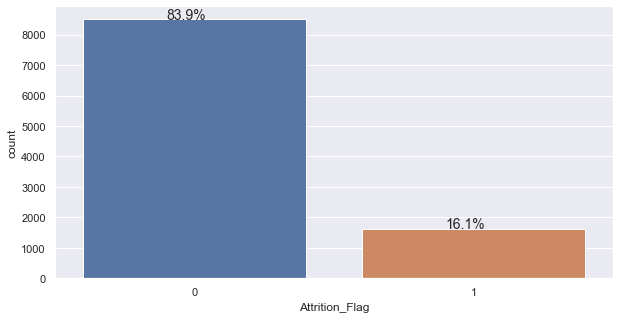

In [57]:
perc_on_bar(data['Attrition_Flag']) 

**Observations**
- This plot shows the distribution of both classes in the target variable is imbalanced.
- Approx 16.1% customers are churned.

### Observations on Gender

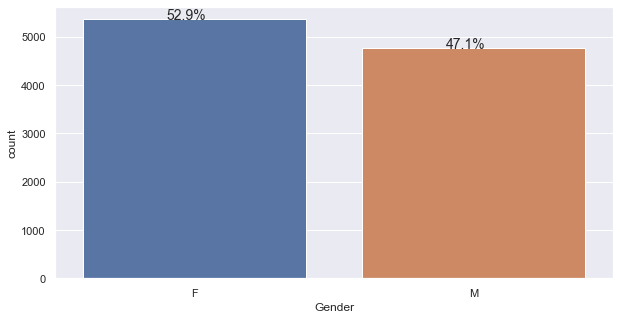

In [58]:
perc_on_bar(data['Gender']) 

**Observations**
- Female customers are more than the number of male customers.
- There are approx 52.9% female customers as compared to 47.1% male customers.
- The gender balance is more or less equal.

### Observations on Dependent_count

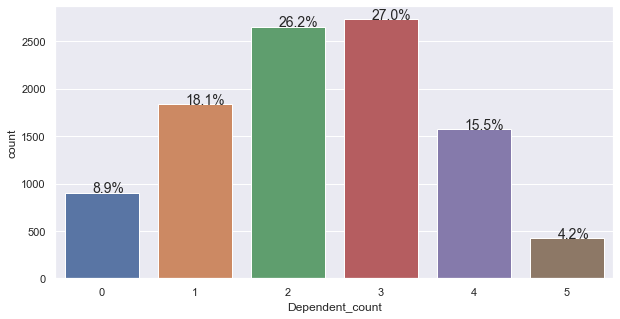

In [59]:
perc_on_bar(data['Dependent_count']) 

**Observations**
- Most customers have 3 dependents at 27.0%, followed closely by 2 (26.2%) then 1 dependent (18.1%).
- Only 8.9% of customers have no dependent which suggests most customers are family oriented with dependents.

### Observations on Education_Level

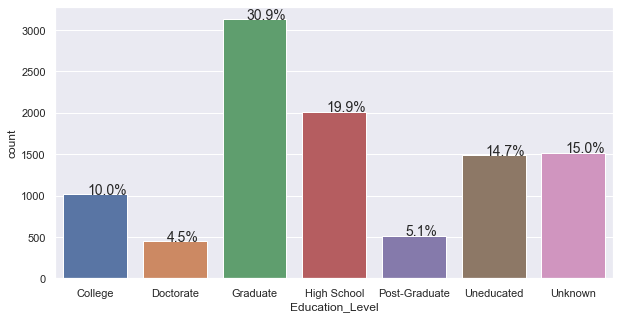

In [60]:
perc_on_bar(data['Education_Level']) 

**Observations**
- Most customers at 30.9% are graduates with a distant 2nd of high school graduates at 19.9%.
- 15% of customers' education is unknown.

### Observations on Marital_Status

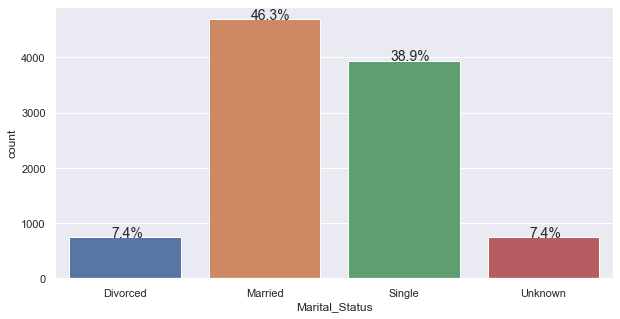

In [61]:
perc_on_bar(data['Marital_Status'])

**Observations**
- Most customers are married (46.3%) and therefore are family oriented, followed by singles at 38.9%.

### Observations on Income_Category

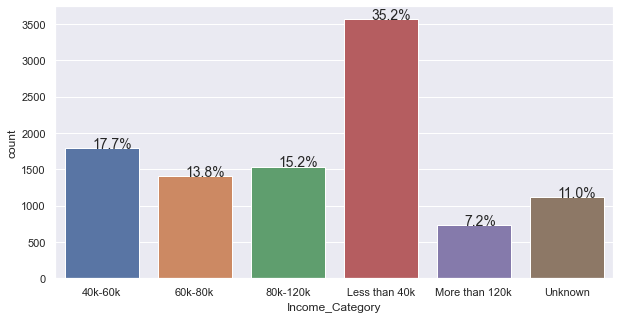

In [62]:
perc_on_bar(data['Income_Category'])

**Observations**
- A vast majority of customers are in the less than $40K annual income at 35.2%. It seems the bank's card services are popular with the lower income groups.

### Observations on Card_Category

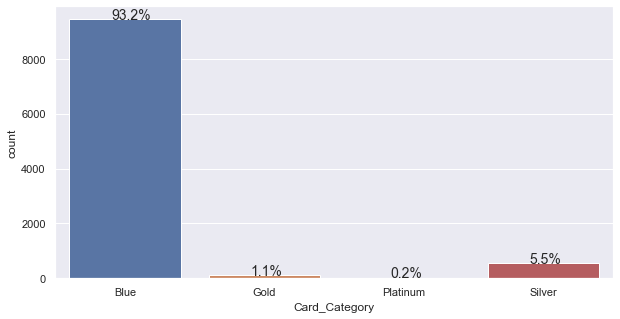

In [63]:
perc_on_bar(data['Card_Category'])

**Observations**
- A vast majority of card users are using blue cards which is likely the most budget type appealing to lower income groups and faring well among other groups as well. In contrast, the other card products need a relook at their low take up rate.

### Observations on Total_Relationship_Count

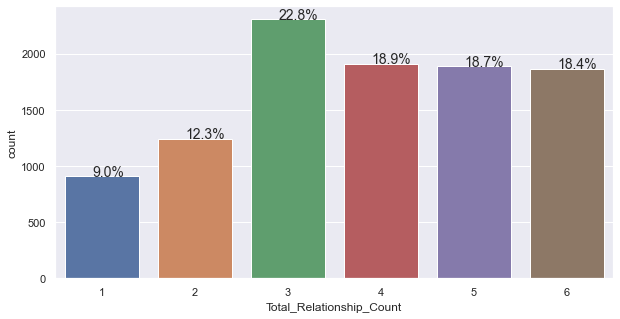

In [64]:
perc_on_bar(data['Total_Relationship_Count'])

**Observations**
- Most customers have 3 products or more with the bank (78.8%) while the number of customers remained the same for 4 to 6 products with the bank.

### Observations on Months_Inactive_12_mon

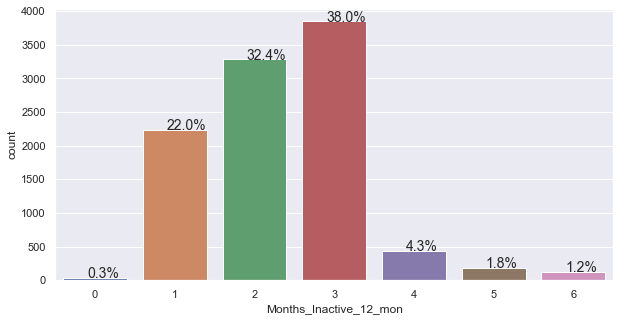

In [65]:
perc_on_bar(data['Months_Inactive_12_mon'])

**Observations**
- Most of the customers have 3 or less months of inactivity in a 12 month period at 92.7%.

### Observations on Contacts_Count_12_mon

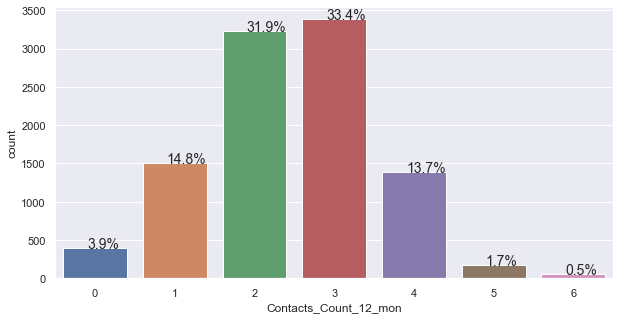

In [66]:
perc_on_bar(data['Contacts_Count_12_mon'])

**Observations**
- Most of the customers have 2 or 3 contacts with the bank in a 12 month period with more customers contacting the bank less than 3 times than more than 3 times.

## Bivariate Analysis

Wall time: 51.8 s


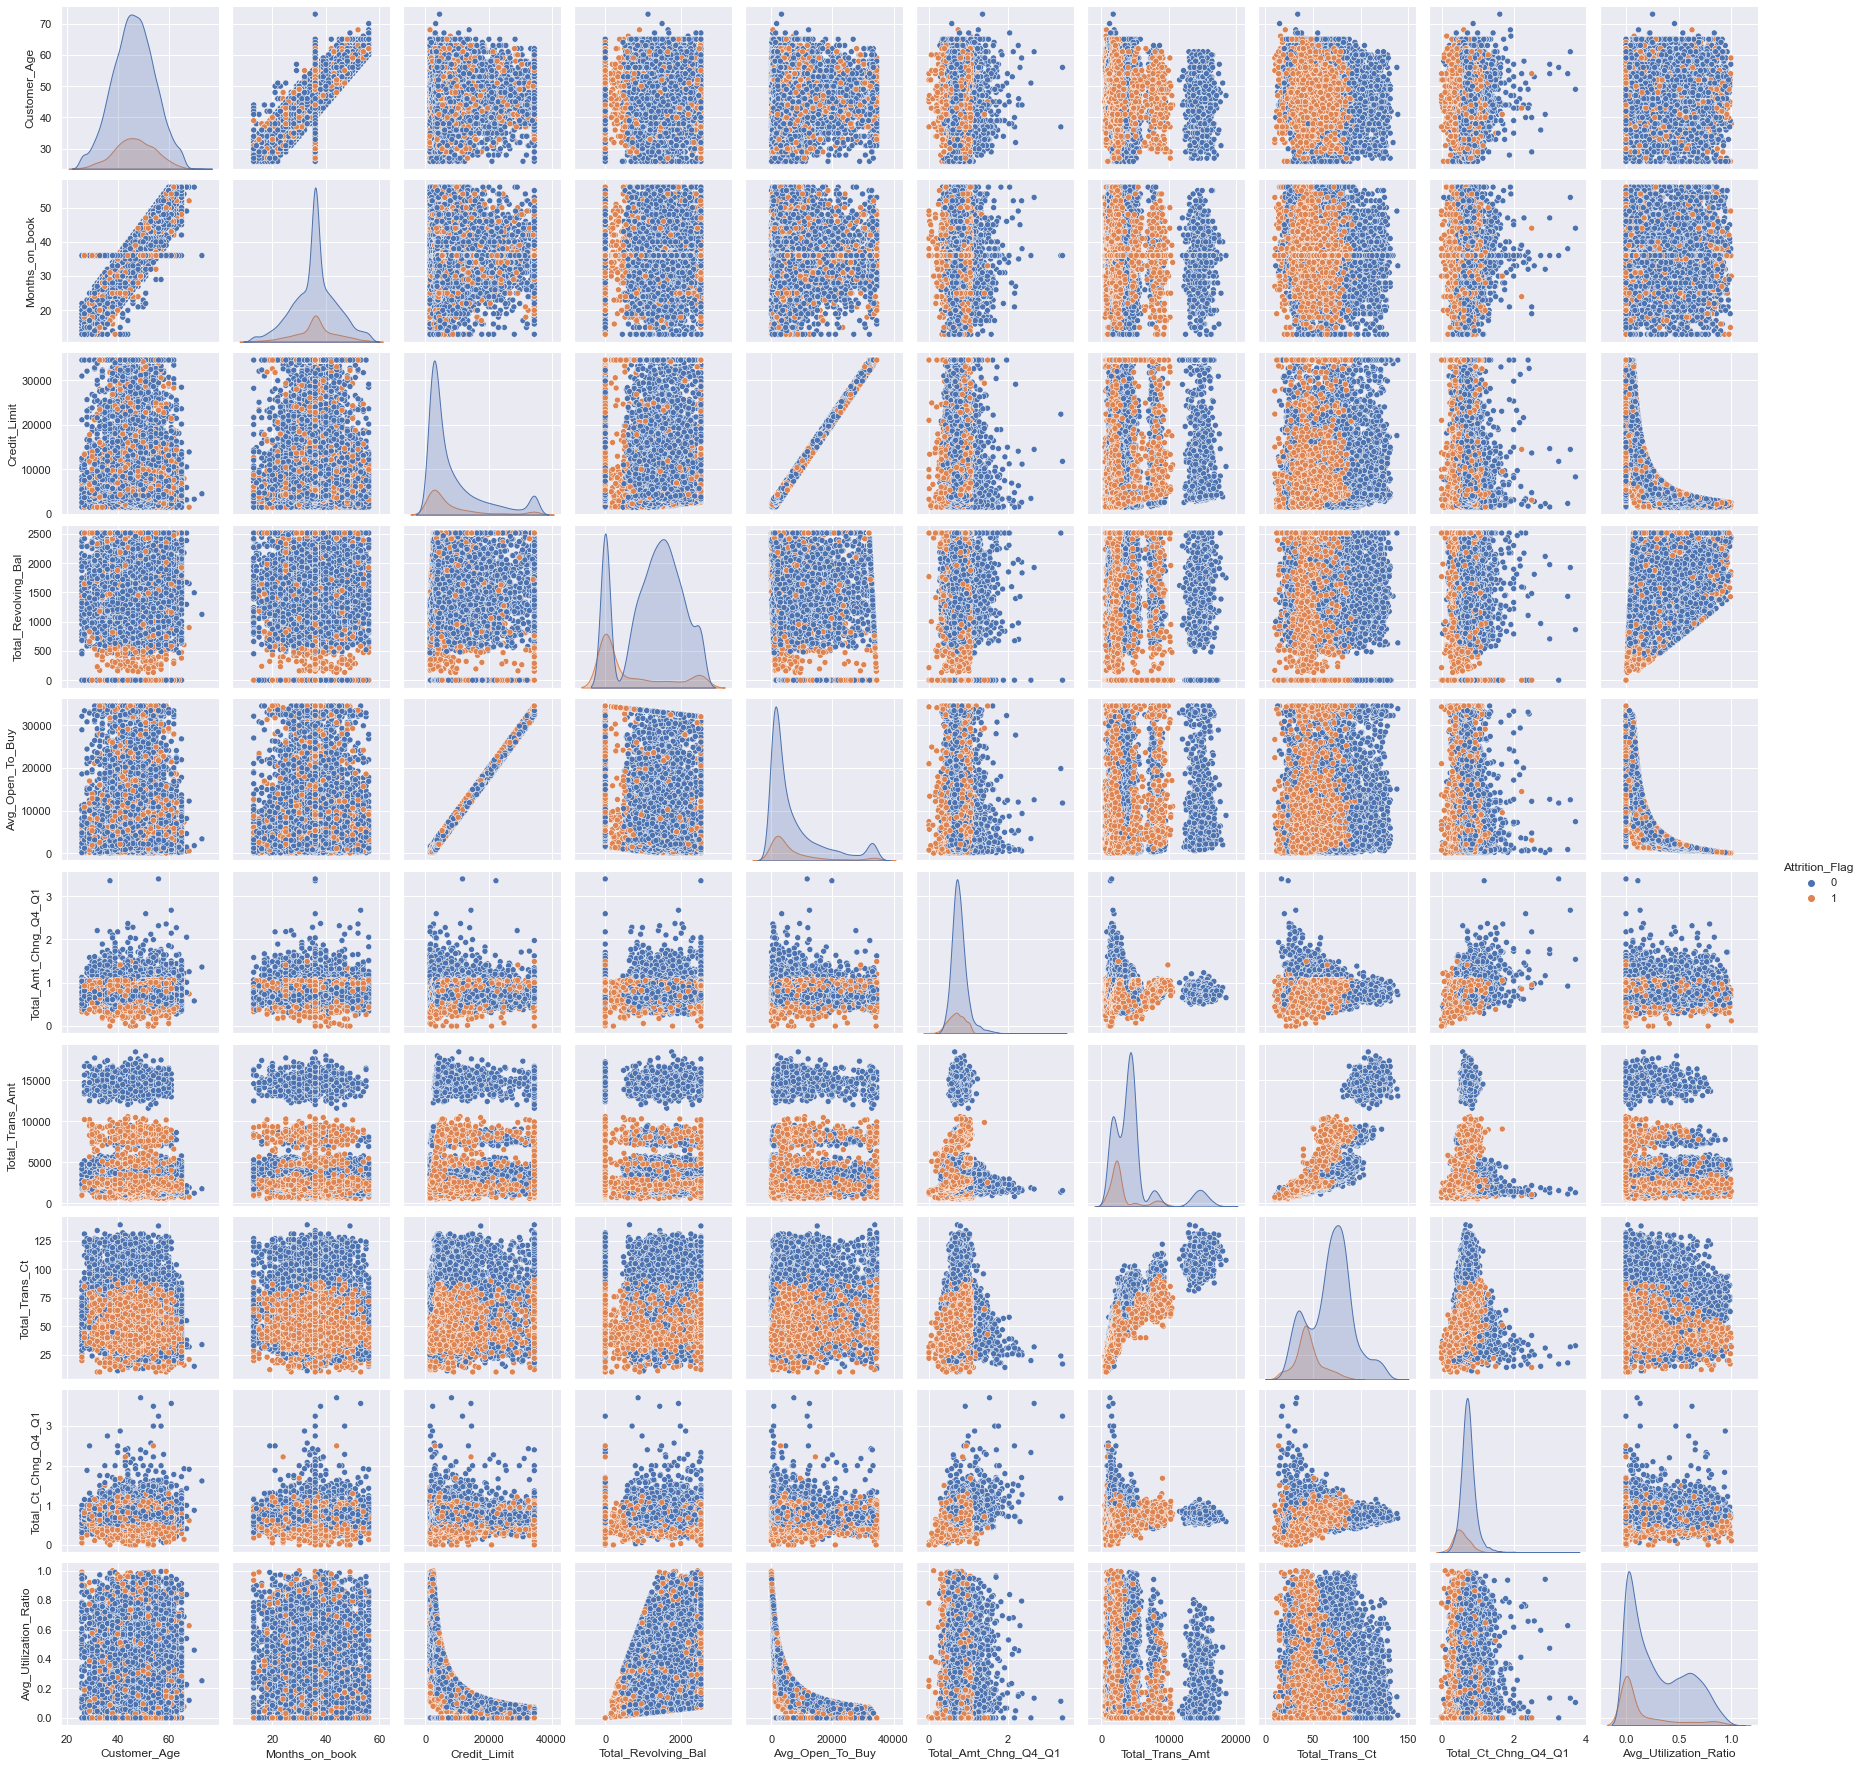

In [67]:
%%time 
sns.pairplot(data=data,hue='Attrition_Flag')

**Observations**
- From the pairplots, attrited customers display lower Total_Trans_Amt and Total_Trans_Ct which suggests prior to quitting the card services, they start to use the card much lesser and spend lesser on it before giving up the card.
- It can also be derived that many of the attrited customers start to use less of the bank's card services in Q1 vs the previous quarter, Q4.

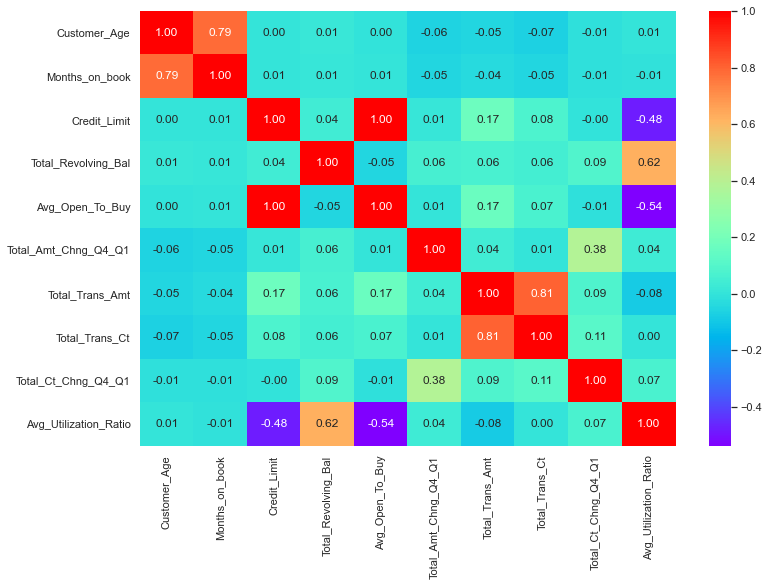

Wall time: 1.25 s


In [68]:
%%time 
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

**Observations**
- Credit_Limit and Avg_Open_To_Buy are perfectly correlated (1.0) one of these variables can be removed as their concept is the same.
- Total_Trans_Ct and Total_Trans_Amt are highly positively correlated. (0.81)
- Months_on_book and Customer_Age are highly positively correlated. (0.79)
- Total_Revolving_Bal is correlated to Avg_Utilization_Ratio. (0.62)
- Credit_Limit and Avg_Utilization_Ratio are negatively correlated since the more credit is untilized, the less credit is available to use. (-0.48)
- Avg_Open_To_Buy and Avg_Utilization_Ratio are negatively correlated since the more credit is untilized, the less credit is available to use. (-0.54)

### Observations on Attrition_Flag vs Numeric Values

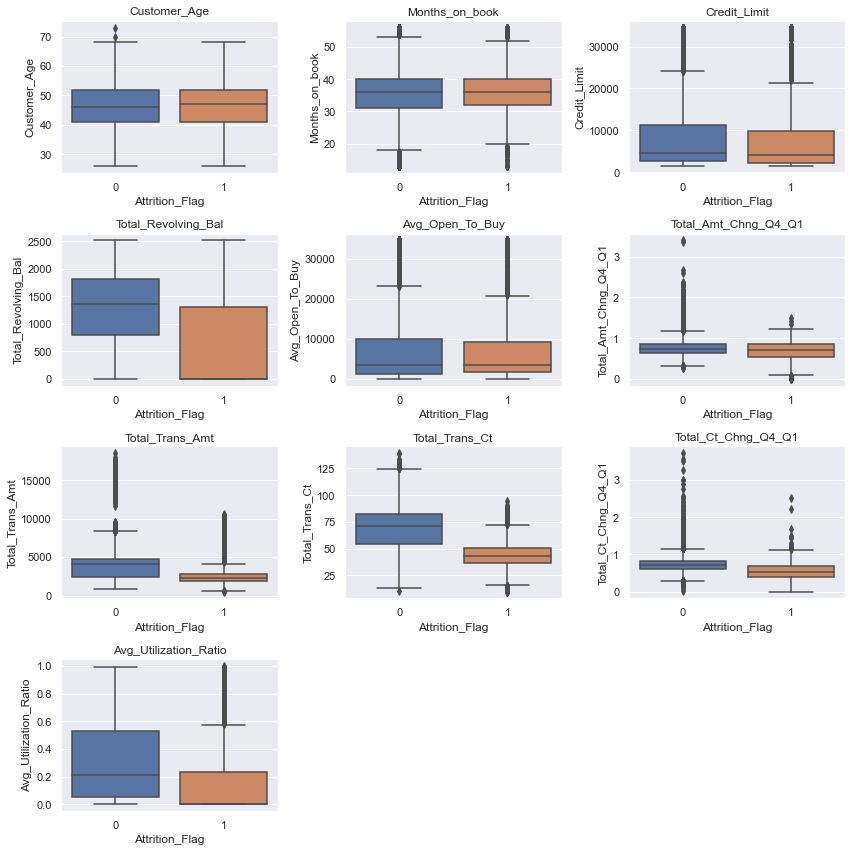

In [69]:
cols = data[['Customer_Age','Months_on_book','Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1'
             ,'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']].columns.tolist()
plt.figure(figsize=(12,12))

for i, variable in enumerate(cols):
                     plt.subplot(4,3,i+1)
                     sns.boxplot(data["Attrition_Flag"],data[variable])#,palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observations**
- Attrited customers displayed a significant lesser transaction count and amount in Total_Trans_Amt and Total_Trans_Ct.
- Attrited customers tended to have a lower Total_Revolving_Bal than existing customers, this is in line with attrited customers tending to spend less on the bank's cards.
- This is especially reinforced in the Avg_Utilization_Ratio where most attrited customers spend less than 0.2 of their credit limit.
- Attrited customers also displayed a lower ratio of spending counts from Q4 last year to Q1 this year than existing customers in Total_Ct_Chng_Q4_Q1.

In [70]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x,flag=True):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Attrition_Flag'],margins=True)
    if flag==True:
        print(tab1)
        print('-'*120)
    tab = pd.crosstab(x,data['Attrition_Flag'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### Observations on Attrition_Flag vs Gender

Attrition_Flag     0     1    All
Gender                           
F               4428   930   5358
M               4072   697   4769
All             8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


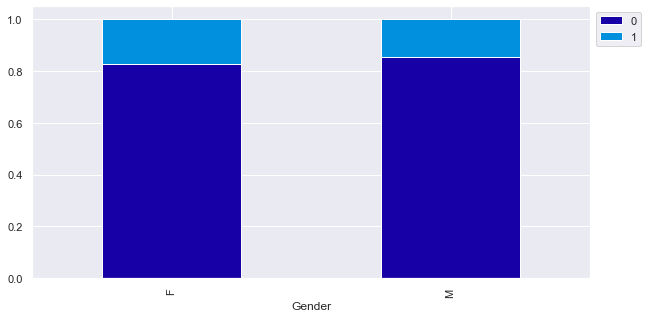

In [71]:
stacked_plot(data.Gender)

**Observations**
- There is not much difference in both genders attriting as customers. Females attrited slightly more than males.

### Observations on Attrition_Flag vs Dependent_count

Attrition_Flag      0     1    All
Dependent_count                   
0                 769   135    904
1                1569   269   1838
2                2238   417   2655
3                2250   482   2732
4                1314   260   1574
5                 360    64    424
All              8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


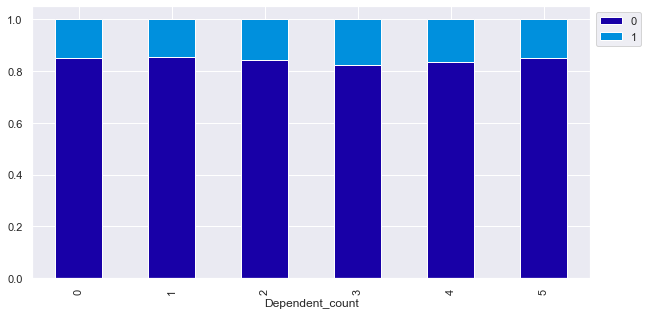

In [72]:
stacked_plot(data.Dependent_count)

**Observations**
- The dependents that customers do not seem to have a significant bearing on attriting customers, however customers with 3 dependents seemed to have a higher ratio of attriting.

### Observations on Attrition_Flag vs Education_Level

Attrition_Flag      0     1    All
Education_Level                   
College           859   154   1013
Doctorate         356    95    451
Graduate         2641   487   3128
High School      1707   306   2013
Post-Graduate     424    92    516
Uneducated       1250   237   1487
Unknown          1263   256   1519
All              8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


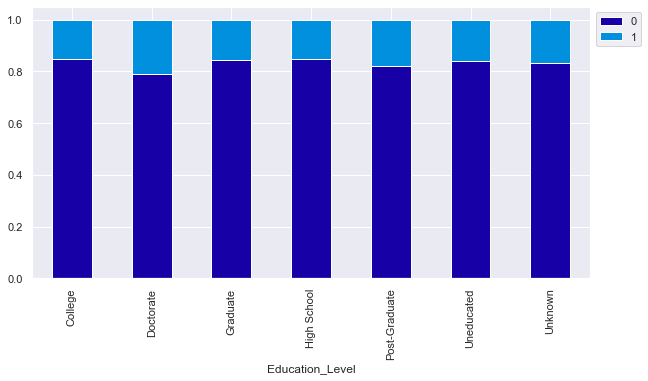

In [73]:
stacked_plot(data.Education_Level)

**Observations**
- Customers with post-graduate and doctorate degrees have a slightly higher attrition rates then others. This may be that the cards services are more popular with the lower income groups where income is related to education levels.

### Observations on Attrition_Flag vs Marital_Status

Attrition_Flag     0     1    All
Marital_Status                   
Divorced         627   121    748
Married         3978   709   4687
Single          3275   668   3943
Unknown          620   129    749
All             8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


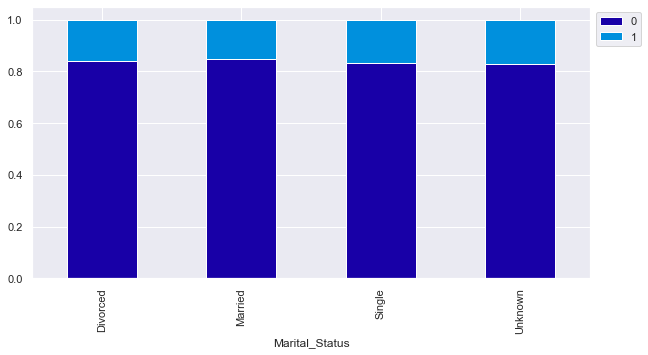

In [74]:
stacked_plot(data.Marital_Status)

**Observations**
- There is no difference in marital status attriting as customers.

### Observations on Attrition_Flag vs Income_Category

Attrition_Flag      0     1    All
Income_Category                   
40k-60k          1519   271   1790
60k-80k          1213   189   1402
80k-120k         1293   242   1535
Less than 40k    2949   612   3561
More than 120k    601   126    727
Unknown           925   187   1112
All              8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


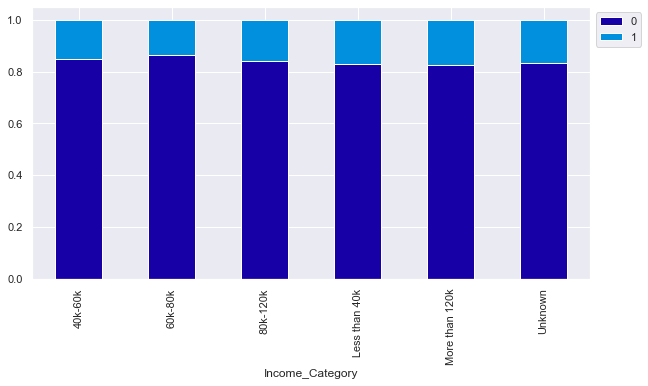

In [75]:
stacked_plot(data.Income_Category)

**Observations**
- There is not much difference in all income groups attriting as customers.

### Observations on Attrition_Flag vs Card_Category

Attrition_Flag     0     1    All
Card_Category                    
Blue            7917  1519   9436
Gold              95    21    116
Platinum          15     5     20
Silver           473    82    555
All             8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


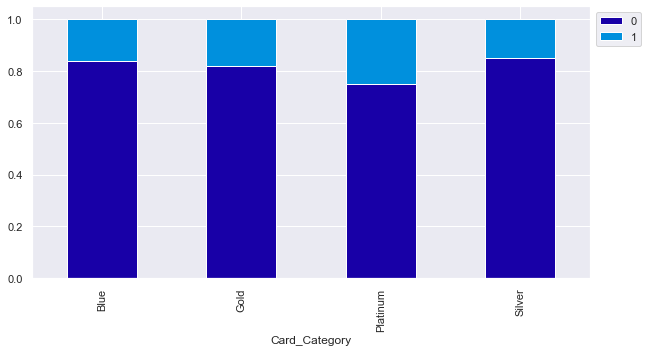

In [76]:
stacked_plot(data.Card_Category)

**Observations**
- Platinum cards seem to be attriting at a higher rate than other cards even though their numbers are small. However they might be the bank's higher profit yielding products and preventing them from churning helps in keeping up profit margin.

### Observations on Attrition_Flag vs Total_Relationship_Count

Attrition_Flag               0     1    All
Total_Relationship_Count                   
1                          677   233    910
2                          897   346   1243
3                         1905   400   2305
4                         1687   225   1912
5                         1664   227   1891
6                         1670   196   1866
All                       8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


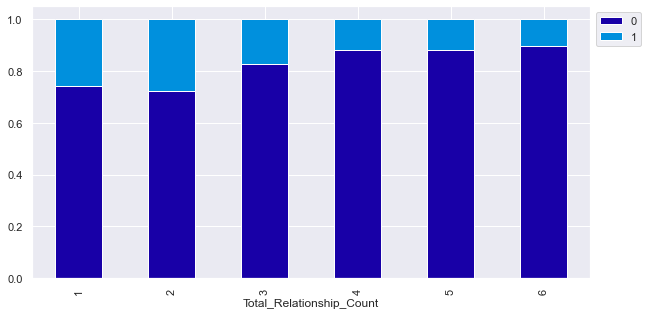

In [77]:
stacked_plot(data.Total_Relationship_Count)

**Observations**
- Attrition tend to diminish to the least once customers have more than 3 products with the bank.

- The bank can consider cross selling more products to existing customers to lower the chance of customers attriting.

### Observations on Attrition_Flag vs Months_Inactive_12_mon

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
0                         14    15     29
1                       2133   100   2233
2                       2777   505   3282
3                       3020   826   3846
4                        305   130    435
5                        146    32    178
6                        105    19    124
All                     8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


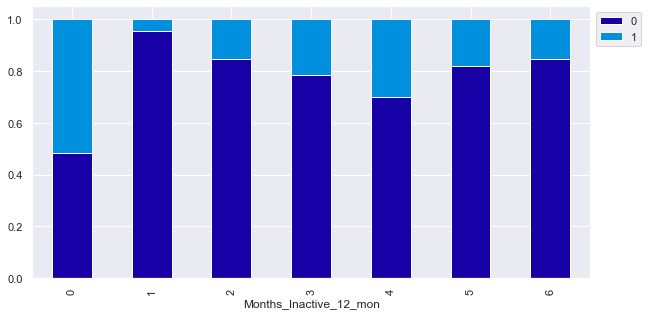

In [78]:
stacked_plot(data.Months_Inactive_12_mon)

**Observations**
- There is a high ratio of attriting customers who are never inactive with the bank's card services but this can be a once off since the numbers are small (15 customers) and could indicate poaching by competitors currently.
- Over a larger time period, 4 months of inactivity among bank card users seem to have the highest attrition rates. It seems to suggest from 0 to 4 months of inactivity offers an early indication of possible customer attrition.
- The bank can consider offering incentives to encourage customer using their cards again.

### Observations on Attrition_Flag vs Contacts_Count_12_mon

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
0                       392     7    399
1                      1391   108   1499
2                      2824   403   3227
3                      2699   681   3380
4                      1077   315   1392
5                       117    59    176
6                         0    54     54
All                    8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


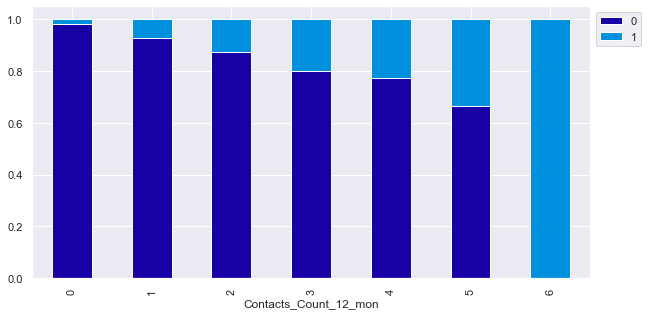

In [79]:
stacked_plot(data.Contacts_Count_12_mon)

**Observations**
- It seems that the contacts between customer and bank is of the complaint nature as those with no contact have negligible attrition rates while attrition rate climbs with more customer contacts with the bank. 6 contacts in the last 12 months offers a 100% attrition rate.
- The bank should look to improve its card services and reduce complaints possibly indicating higher attrition chances in the future.

### Observations on Attrition_Flag vs Card_Category vs Total_Trans_Amt

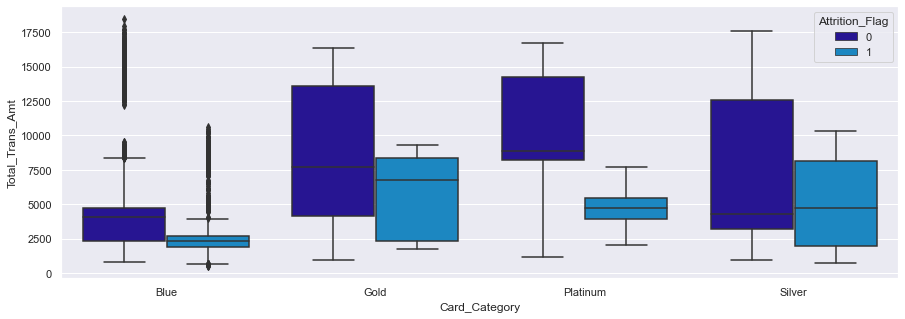

In [80]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Total_Trans_Amt',x='Card_Category',hue='Attrition_Flag',data=data)
#sns.boxplot(y='Total_Trans_Amt',x='Card_Category',data=data)
plt.show()

**Observations**
- It appears that all attriting customers of the card categories spend lower in total than customers who don't. 
- This is especially more telling among platinum card holders who also on average spend higher than other card categories.

### Observations on Education_Level vs Income_Category

<AxesSubplot:xlabel='Income_Category'>

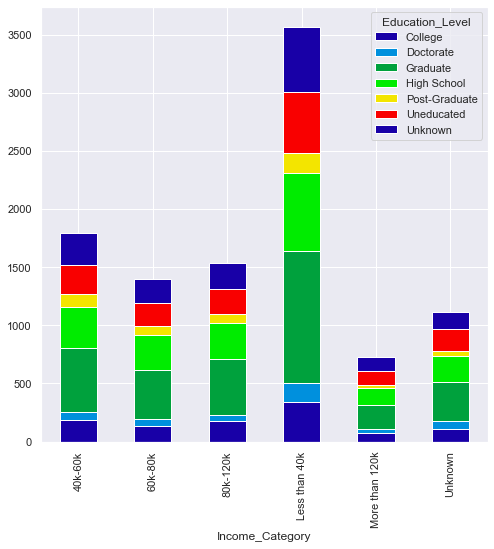

In [81]:
pd.crosstab(data['Income_Category'],data['Education_Level'])
pd.crosstab(data['Income_Category'],data['Education_Level']).plot(kind="bar", figsize=(8,8), stacked=True)

**Observations**
- There does not appear to be a correlation for higher income category with higher education levels.

### Observations on Card_Category vs Income_Category

<AxesSubplot:xlabel='Income_Category'>

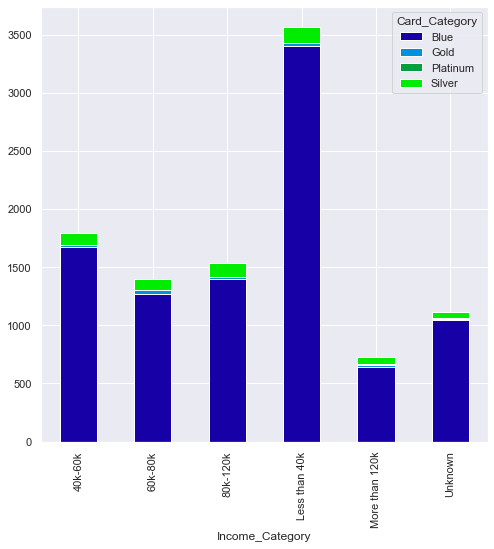

In [82]:
pd.crosstab(data['Income_Category'],data['Card_Category'])
pd.crosstab(data['Income_Category'],data['Card_Category']).plot(kind="bar", figsize=(8,8), stacked=True)

**Observations**
- It seems to be that a large proportion of customers regardless of income levels have the blue card followed far behind by the silver card.

## EDA Business Insights
- Customers with less credit balance per month to roll over in Total_Revolving_Bal are more likely to churn. The bank can consider extending lower interest or interest free offers to customers with good credit to entice them to stay on. 
- Customers with less transaction amounts and counts, use less of their available credit are more likely to churn. The bank can look into extending low usage card holders with merchant tie up discounts or fee waivers or rebates to encourage more spending with the bank's cards.
- Customers who showed a much lower ratio of spending in Q1 compared to last year Q4 tend to be churned. Customers who exhibited this behavior should be actively engaged to retain them.
- Customers are less likely to be churned when they have 3 or more product services with the bank. The bank can look into cross selling more products to existing customers to lower the chance of customers churning.
- A high ratio of customers with 0 months of inactivity are being churned likely from a competitor's promotion campaign. 0 to 4 months of inactivity offers an early indication of possible customer attrition. Beyond that, the attrition rate seems fairly constant. The bank can consider offering incentives to encourage customer utilizing their card services again. 
- Customers who logged in more contacts with the bank are more likely to leave indicating the nature of the contacts are complaints about unhappiness with the services. The bank should look into improving its card services to improve customer satisfaction thus preventing complaints and the risk of customer attrition.
- Platinum card customers are attriting at a higher rate than the other card categories. Even though their numbers are small, they may be higher profit margin products with platinum card holders spending more than average than others 
- Platinum card holders who are attriting exhibit a very pronounced pattern of lower spending than staying platinum card holders.

# Data Pre-Processing & Feature Engineering

## Missing Values & Duplicate Values
- It has been found earlier in the EDA viewing the dataset, that there are no missing nor duplicate values.

## Eliminate Potential Multicollinearity
- Variables Credit_Limit and Avg_Open_To_Buy are perfectly correlated, Avg_Open_To_Buy is dropped as this yields better f1-scores in model building through experimentation.
- Total_Trans_Amt and Total_Trans_Ct are highly correlated at 0.81, Total_Trans_Ct is dropped as this yields better f1-scores in model building through experimentation.
- Months_on_book and Customer_Age are highly correlated at 0.79, Customer_Age is dropped as this yields better f1-scores in model building through experimentation.
- Avg_Utilization_Ratio is correlated to Credit_Limit, Total_Revolving_Bal and Avg_Open_To_Buy, it should be dropped to remove several multicollinearities.

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [84]:
data.drop(["Avg_Open_To_Buy"],axis=1,inplace=True)
#data.drop(["Credit_Limit"],axis=1,inplace=True)

#data.drop(["Total_Trans_Amt"],axis=1,inplace=True)
data.drop(["Total_Trans_Ct"],axis=1,inplace=True)

#data.drop(["Months_on_book"],axis=1,inplace=True)
data.drop(["Customer_Age"],axis=1,inplace=True) 

#data.drop(["Total_Revolving_Bal"],axis=1,inplace=True)
data.drop(["Avg_Utilization_Ratio"],axis=1,inplace=True)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Gender                    10127 non-null  category
 2   Dependent_count           10127 non-null  category
 3   Education_Level           10127 non-null  category
 4   Marital_Status            10127 non-null  category
 5   Income_Category           10127 non-null  category
 6   Card_Category             10127 non-null  category
 7   Months_on_book            10127 non-null  int64   
 8   Total_Relationship_Count  10127 non-null  category
 9   Months_Inactive_12_mon    10127 non-null  category
 10  Contacts_Count_12_mon     10127 non-null  category
 11  Credit_Limit              10127 non-null  float64 
 12  Total_Revolving_Bal       10127 non-null  int64   
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  floa

## Treating Outliers

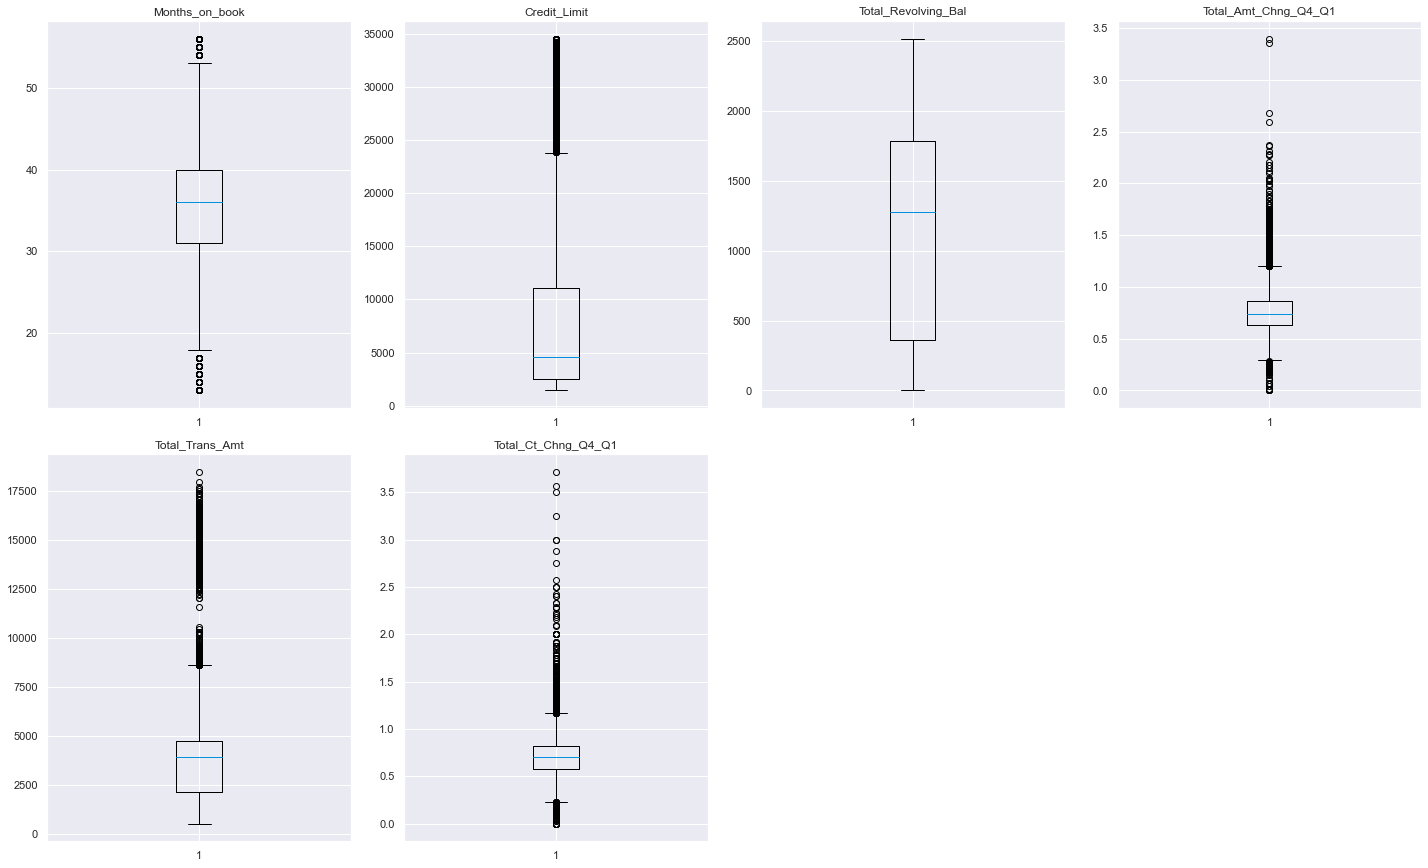

In [86]:
# Listing all mumerical value boxplots
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

***Observations***

The following variables have outliers:
- Months_on_book (3.8% of observations)
- Credit_Limit (9.7% of observations)
- Total_Revolving_Bal
- Total_Amt_Chng_Q4_Q1 (3.9% of observations)
- Total_Trans_Amt (8.8% of observations)
- Total_Ct_Chng_Q4_Q1 (3.9% of observations)

In [87]:
# Lets treat outliers by flooring and capping
def treat_outliers(dataf,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    dataf: data frame
    col: name of the column
    '''
    Q1=dataf[col].quantile(0.25) # 25th quantile
    Q3=dataf[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    dataf[col] = np.clip(dataf[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return dataf

def treat_outliers_all(dataf, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    dataf: data frame
    '''
    for c in col_list:
        dataf = treat_outliers(dataf,c)
        
    return dataf

In [88]:
data = treat_outliers_all(data,numerical_col)

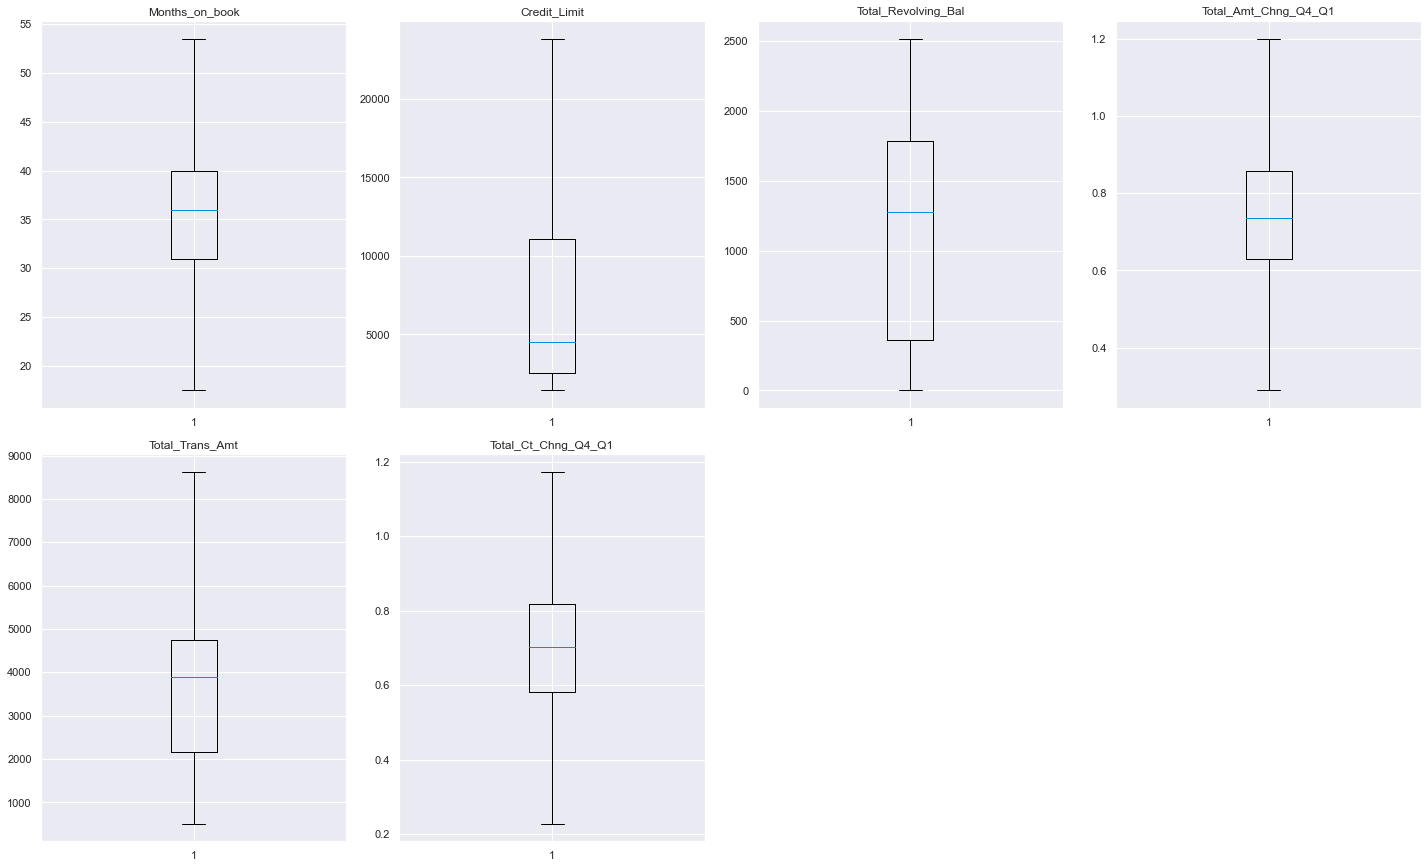

In [89]:
# Listing all mumerical value boxplots
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

***Observations***
- Outliers are treated.

## Treating Unknown Values
* We will use KNN imputer to impute unknown values.
* `KNNImputer`: Each sample's unknown values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces unknown values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.

In [90]:
cat_cols=['Education_Level','Marital_Status','Income_Category']

for column in cat_cols:
    print(data[column].value_counts(dropna=False))
    print('-'*30)

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
------------------------------
Less than 40k     3561
40k-60k           1790
80k-120k          1535
60k-80k           1402
Unknown           1112
More than 120k     727
Name: Income_Category, dtype: int64
------------------------------


In [91]:
# change the target imputed variables to string for KNNImputer to work
for column in cat_cols:
    data[column]=data[column].astype('str')

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Gender                    10127 non-null  category
 2   Dependent_count           10127 non-null  category
 3   Education_Level           10127 non-null  object  
 4   Marital_Status            10127 non-null  object  
 5   Income_Category           10127 non-null  object  
 6   Card_Category             10127 non-null  category
 7   Months_on_book            10127 non-null  float64 
 8   Total_Relationship_Count  10127 non-null  category
 9   Months_Inactive_12_mon    10127 non-null  category
 10  Contacts_Count_12_mon     10127 non-null  category
 11  Credit_Limit              10127 non-null  float64 
 12  Total_Revolving_Bal       10127 non-null  int64   
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  floa

In [93]:
data["Education_Level"].replace("Unknown", np.nan, inplace=True)
data["Marital_Status"].replace("Unknown", np.nan, inplace=True)
data["Income_Category"].replace("Unknown", np.nan, inplace=True)

In [94]:
cat_cols=['Education_Level','Marital_Status','Income_Category']

for column in cat_cols:
    print(data[column].value_counts(dropna=False))
    print('-'*30)

Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
------------------------------
Married     4687
Single      3943
NaN          749
Divorced     748
Name: Marital_Status, dtype: int64
------------------------------
Less than 40k     3561
40k-60k           1790
80k-120k          1535
60k-80k           1402
NaN               1112
More than 120k     727
Name: Income_Category, dtype: int64
------------------------------


In [95]:
data.isnull().sum()

Attrition_Flag                 0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Ct_Chng_Q4_Q1            0
dtype: int64

In [96]:
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)

In [97]:
reqd_col_for_impute = cat_cols

In [98]:
data[reqd_col_for_impute].head(10)

Education_Level Marital_Status Income_Category
0     High School        Married         60k-80k
1        Graduate         Single   Less than 40k
2        Graduate        Married        80k-120k
3     High School            NaN   Less than 40k
4      Uneducated        Married         60k-80k
5        Graduate        Married         40k-60k
6             NaN        Married  More than 120k
7     High School            NaN         60k-80k
8      Uneducated         Single         60k-80k
9        Graduate         Single        80k-120k

In [99]:
cat_cols=['Education_Level','Marital_Status','Income_Category']

for column in cat_cols:
    print(data[column].value_counts(dropna=False))
    print('-'*30)

Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
------------------------------
Married     4687
Single      3943
NaN          749
Divorced     748
Name: Marital_Status, dtype: int64
------------------------------
Less than 40k     3561
40k-60k           1790
80k-120k          1535
60k-80k           1402
NaN               1112
More than 120k     727
Name: Income_Category, dtype: int64
------------------------------


In [100]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
Income_Category = {'Less than 40k':0,'40k-60k':1,'60k-80k':2,'80k-120k':3,'More than 120k':4}
data['Income_Category'] = data['Income_Category'].map(Income_Category)

Marital_Status = {'Single':0,'Married':1,'Divorced':2}
data['Marital_Status'] = data['Marital_Status'].map(Marital_Status)

Education_Level= {'Graduate':0, 'High School':1, 'Uneducated':2, 'College':3, 'Post-Graduate':4, 
                 'Doctorate':5}  
data['Education_Level'] = data['Education_Level'].map(Education_Level)

In [101]:
cat_cols=['Education_Level','Marital_Status','Income_Category']

for column in cat_cols:
    print(data[column].value_counts(dropna=False))
    print('-'*30)

0.0    3128
1.0    2013
NaN    1519
2.0    1487
3.0    1013
4.0     516
5.0     451
Name: Education_Level, dtype: int64
------------------------------
1.0    4687
0.0    3943
NaN     749
2.0     748
Name: Marital_Status, dtype: int64
------------------------------
0.0    3561
1.0    1790
3.0    1535
2.0    1402
NaN    1112
4.0     727
Name: Income_Category, dtype: int64
------------------------------


- Values have been encoded.

# Modelling Data Preparation, Definition & Evaluation Criteria
## Split the data into train,validation and test sets

In [102]:
Y = data["Attrition_Flag"]
X = data.drop("Attrition_Flag" , axis=1)

# creating dummy variables
# X = pd.get_dummies(X, drop_first=True)

# Splitting data into training, validation and test set: first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)
print(X_temp.shape, X_test.shape, y_temp.shape, y_test.shape)

(8101, 15) (2026, 15) (8101,) (2026,)


### Imputing Missing Values

In [103]:
#Fit and transform the train data
X_temp[reqd_col_for_impute]=imputer.fit_transform(X_temp[reqd_col_for_impute])

#Transform the test data 
X_test[reqd_col_for_impute]=imputer.transform(X_test[reqd_col_for_impute])

In [104]:
#Checking that no column has missing values in train or test sets
print(X_temp.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
dtype: int64
------------------------------
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
dtype: int64


In [105]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_temp[y] = np.round(X_temp[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [106]:
inverse_mapping(Income_Category,'Income_Category')
inverse_mapping(Marital_Status,'Marital_Status')
inverse_mapping(Education_Level,'Education_Level')

In [107]:
#Check all NaN values are imputed
cat_cols=['Education_Level','Marital_Status','Income_Category']

for column in cat_cols:
    print(X_temp[column].value_counts(dropna=False))
    print('-'*30)

Graduate         2568
High School      2361
Uneducated       1565
College           841
Post-Graduate     413
Doctorate         353
Name: Education_Level, dtype: int64
------------------------------
Married     4266
Single      3249
Divorced     586
Name: Marital_Status, dtype: int64
------------------------------
Less than 40k     2879
40k-60k           1980
60k-80k           1411
80k-120k          1246
More than 120k     585
Name: Income_Category, dtype: int64
------------------------------


In [108]:
#Check all NaN values are imputed
cat_cols=['Education_Level','Marital_Status','Income_Category']

for column in cat_cols:
    print(X_test[column].value_counts(dropna=False))
    print('-'*30)

Graduate         675
High School      570
Uneducated       377
College          203
Post-Graduate    103
Doctorate         98
Name: Education_Level, dtype: int64
------------------------------
Married     1035
Single       829
Divorced     162
Name: Marital_Status, dtype: int64
------------------------------
Less than 40k     697
40k-60k           525
60k-80k           373
80k-120k          289
More than 120k    142
Name: Income_Category, dtype: int64
------------------------------


In [109]:
# change the imputed variables to category
for column in cat_cols:
    data[column]=data[column].astype('category')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Gender                    10127 non-null  category
 2   Dependent_count           10127 non-null  category
 3   Education_Level           8608 non-null   category
 4   Marital_Status            9378 non-null   category
 5   Income_Category           9015 non-null   category
 6   Card_Category             10127 non-null  category
 7   Months_on_book            10127 non-null  float64 
 8   Total_Relationship_Count  10127 non-null  category
 9   Months_Inactive_12_mon    10127 non-null  category
 10  Contacts_Count_12_mon     10127 non-null  category
 11  Credit_Limit              10127 non-null  float64 
 12  Total_Revolving_Bal       10127 non-null  int64   
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  floa

### Encoding categorical variables

In [111]:
X_temp=pd.get_dummies(X_temp,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_temp.shape, X_test.shape)

(8101, 43) (2026, 43)


### Split to Train and Validation Sets

In [112]:
# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(6075, 43) (2026, 43) (2026, 43) (6075,) (2026,) (2026,)


In [113]:
Y.value_counts(1) # test the ratio of 1s to 0s

0    0.83934
1    0.16066
Name: Attrition_Flag, dtype: float64

In [114]:
y_train.value_counts(1) # test the ratio of 1s to 0s

0    0.839342
1    0.160658
Name: Attrition_Flag, dtype: float64

In [115]:
y_val.value_counts(1) # test the ratio of 1s to 0s

0    0.839092
1    0.160908
Name: Attrition_Flag, dtype: float64

In [116]:
y_test.value_counts(1) # test the ratio of 1s to 0s

0    0.839585
1    0.160415
Name: Attrition_Flag, dtype: float64

## Model Evaluation Criterion

### Model can make wrong predictions as:
1. False Positive: Predicting a customer is going to be churned but actually not so.
2. False Negative: Predicting a customer is staying but actually churning.

### Which case is more important? 
- Both the cases are important as:
- If we predict a customer is going to be churned but actually not so then the wrong reasons for attrition will be derived.
- If we predict a customer is not going to be churned but actually customer is going to be churned, then no effort will be spent on improving the services to the customer profiles to persuade them to stay with the bank's card services.

### How to reduce losses?
- We can use accuracy but since the data is imbalanced it would not be the right metric to check the model performance.
-  Therefore, `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

# Model building - Logistic Regression

In [117]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    train_f1 = metrics.f1_score(train_y,pred_train)
    test_f1 = metrics.f1_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be displayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on validation set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on validation set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on validation set : ",metrics.precision_score(test_y,pred_test))
        print("f1 score on training set : ",metrics.f1_score(train_y,pred_train))
        print("f1 score on validation set : ",metrics.f1_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [118]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_val)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression on original data

In [119]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

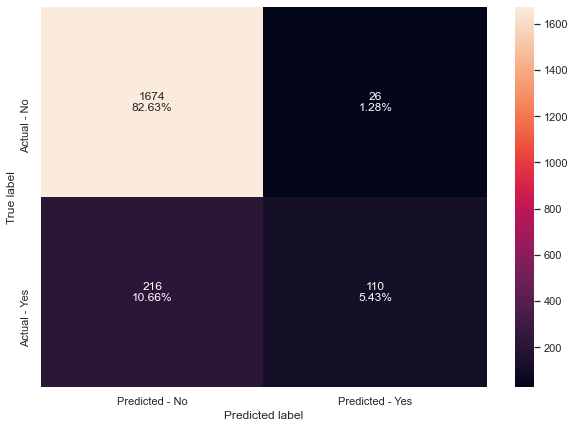

In [120]:
# creating confusion matrix
make_confusion_matrix(lr,y_val)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [121]:
num_folds = 10
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = lr
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
print(results)
print("F1 Score: %.3f%% (%.3f%%)" % (np.nanmean(results)*100.0, np.nanstd(results)*100.0))

[0.368      0.52112676 0.44137931 0.46043165 0.43333333 0.48571429
 0.44303797 0.47619048 0.49230769 0.4057971 ]
F1 Score: 45.273% (4.234%)


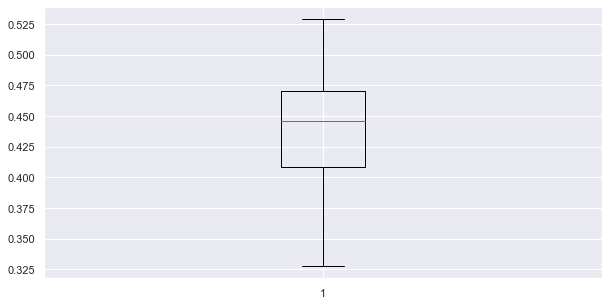

In [122]:
scoring='f1'
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)     #Setting number of splits equal to 10
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [123]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_val,y_train,y_val)

Accuracy on training set :  0.8809876543209877
Accuracy on validation set :  0.8805528134254689
Recall on training set :  0.3473360655737705
Recall on validation set :  0.3374233128834356
Precision on training set :  0.7976470588235294
Precision on validation set :  0.8088235294117647
f1 score on training set :  0.48394004282655245
f1 score on validation set :  0.4761904761904761


**Observations**
- Logistic Regressor is underfitting and scoring badly for f1 but generalizing fairly all right. 
- This is so as well for the f1 score (train data: **48.39%** ; val data: **47.62%**). The gap is **0.77%** points. 
- Based on KFold, it would center at **45.273%** +- **4.234%**.
- Based on StratifiedKFold. it would range between **32.50%** to **52.5%**.

## Logistic Regression on oversampled data
### Oversampling train data using SMOTE

In [124]:
from imblearn.over_sampling import SMOTE

print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 976
Before UpSampling, counts of label 'No': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 43)
After UpSampling, the shape of train_y: (10198,) 



### Logistic Regression on train data post SMOTE

In [125]:
log_reg_over = LogisticRegression(random_state = 42)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=42)

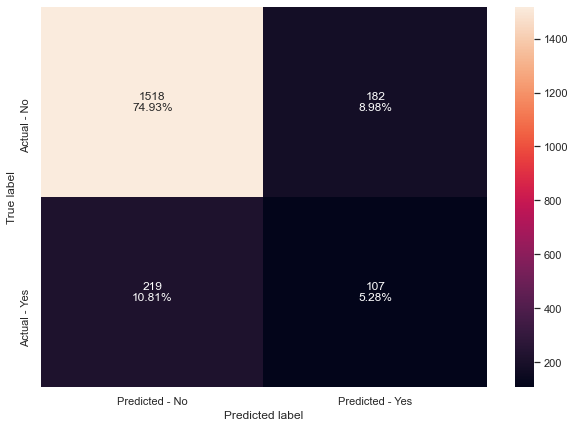

In [126]:
# creating confusion matrix
make_confusion_matrix(log_reg_over,y_val)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [127]:
num_folds = 10
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = log_reg_over
results = cross_val_score(model, X_train_over, y_train_over, cv=kfold, scoring='f1')
print(results)
print("F1 Score: %.3f%% (%.3f%%)" % (np.nanmean(results)*100.0, np.nanstd(results)*100.0))

[0.88477366 0.88090349 0.87315011 0.87966805 0.87090164 0.8600823
 0.89275362 0.89607843 0.88736533 0.89072165]
F1 Score: 88.164% (1.055%)


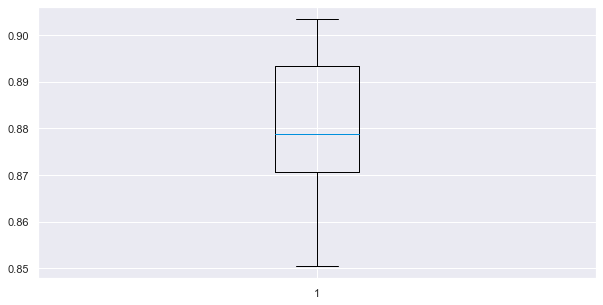

In [128]:
scoring='f1'
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)     #Setting number of splits equal to 10
cv_result_bfr=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [129]:
#Calculating different metrics
scores_LR_over = get_metrics_score(log_reg_over,X_train_over,X_val,y_train_over,y_val)

Accuracy on training set :  0.8624240047068052
Accuracy on validation set :  0.8020730503455084
Recall on training set :  0.8258482055304962
Recall on validation set :  0.3282208588957055
Precision on training set :  0.8910283537875582
Precision on validation set :  0.370242214532872
f1 score on training set :  0.8572010178117049
f1 score on validation set :  0.34796747967479674


**Observations**
- Logistic Regressor under oversampling is overfitting. 
- This is so as well for the f1 score (train data: **85.72%** ; val data: **34.80%**). The gap is **50.92%** points. 
- Based on KFold, however, it would center at **88.164%** +- **1.055%**.
- Based on StratifiedKFold. it would range between **85.00%** to **90.5%**.
- To try Regularization to see if overfitting can be reduced or undersampling the train to handle the imbalance between classes and check the model performance.

### Regularization

In [130]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=42,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='f1')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=42, solver='saga')

Accuracy on training set :  0.6989605805059815
Accuracy on validation set :  0.7502467917077986
Recall on training set :  0.625024514610708
Recall on validation set :  0.6196319018404908
Precision on training set :  0.7334867663981588
Precision on validation set :  0.3458904109589041
f1 score on training set :  0.6749258788648878
f1 score on validation set :  0.443956043956044


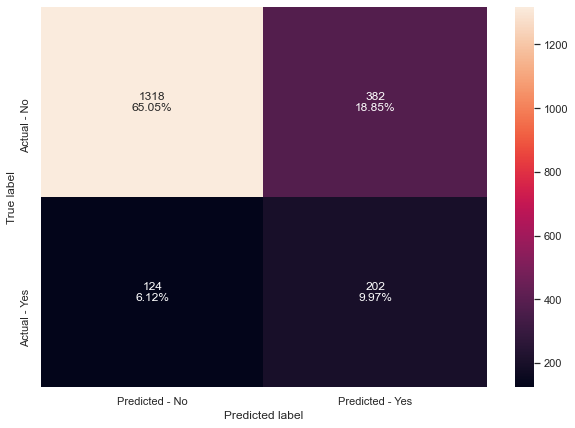

In [131]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_val,y_train_over,y_val)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_val)

**Observations**
- After regularization, overfitting has reduced and the model is performing fair.
- The f1 score is (train data: **67.49%** ; val data: **44.40%**). The gap is **23.09%** points.

## Logistic Regression on undersampled data
### Undersampling train data using Random Sampler

In [132]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 42)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [133]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 43)
After Under Sampling, the shape of train_y: (1952,) 



### Logistic Regression on undersampled data

In [134]:
log_reg_under = LogisticRegression(random_state = 42)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=42)

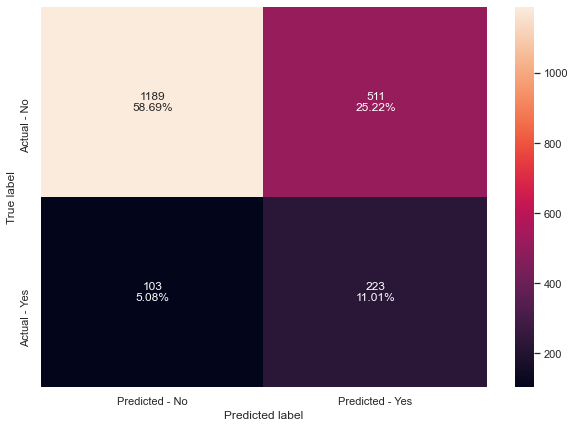

In [135]:
# creating confusion matrix
make_confusion_matrix(log_reg_under,y_val)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [136]:
num_folds = 10
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = log_reg_under
results = cross_val_score(model, X_train_un, y_train_un, cv=kfold, scoring='f1')
print(results)
print("F1 Score: %.3f%% (%.3f%%)" % (np.nanmean(results)*100.0, np.nanstd(results)*100.0))

[0.68292683 0.70652174 0.74611399 0.69387755 0.56818182 0.77595628
 0.72131148 0.68656716 0.73584906 0.75647668]
F1 Score: 70.738% (5.496%)


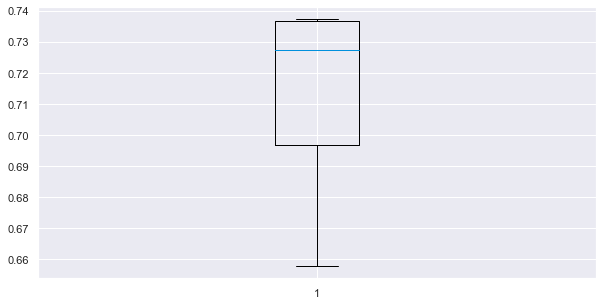

In [137]:
scoring='f1'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

In [138]:
scores_LR_under = get_metrics_score(log_reg_under,X_train_un,X_val,y_train_un,y_val)

Accuracy on training set :  0.6910860655737705
Accuracy on validation set :  0.6969397828232972
Recall on training set :  0.6762295081967213
Recall on validation set :  0.6840490797546013
Precision on training set :  0.6969376979936642
Precision on validation set :  0.30381471389645776
f1 score on training set :  0.6864274570982839
f1 score on validation set :  0.42075471698113204


**Observations**
- Logistic Regressor undersampling tends to overfit as well but less than oversampling. 
- This is so as well for the f1 score (train data: **68.64%** ; val data: **42.08%**). The gap is **26.56%** points. 
- Based on KFold, however, it would center at **70.738%** +- **5.496%**.
- Based on StratifiedKFold. it would range between **~66.00%** to **73.50%**.

# Model building - Bagging, Random Forest & Decision Tree
## Build Decision Tree Model
- We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
- If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.
- In this case, we can pass a dictionary {0:0.16,1:0.84} to the model to specify the weight of each class and the decision tree will give more weightage to class 1 based on the dataset distribution.
- class_weight is a hyperparameter for the decision tree classifier.

In [139]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_val)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [140]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision, F1
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and val results
    score_list=[] 
    
    #Predicting on train and vals
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    val_acc = model.score(X_val,y_val)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    val_recall = metrics.recall_score(y_val,pred_val)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    val_precision = metrics.precision_score(y_val,pred_val)
    
    #F1 of the model
    train_f1 = f1_score(y_train,pred_train)
    val_f1 = f1_score(y_val,pred_val)
    
    score_list.extend((train_acc,val_acc,train_recall,val_recall,train_precision,val_precision, train_f1, val_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on validation set : ",model.score(X_val,y_val))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on validation set : ",metrics.recall_score(y_val,pred_val))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on validation set : ",metrics.precision_score(y_val,pred_val))
        print("f1 score on training set : ",metrics.f1_score(y_train,pred_train))
        print("f1 score on validation set : ",metrics.f1_score(y_val,pred_val))
    
    return score_list # returning the list with train and validation scores

In [141]:
dtree = DecisionTreeClassifier (class_weight={0:0.16,1:0.84},random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.16, 1: 0.84}, random_state=42)

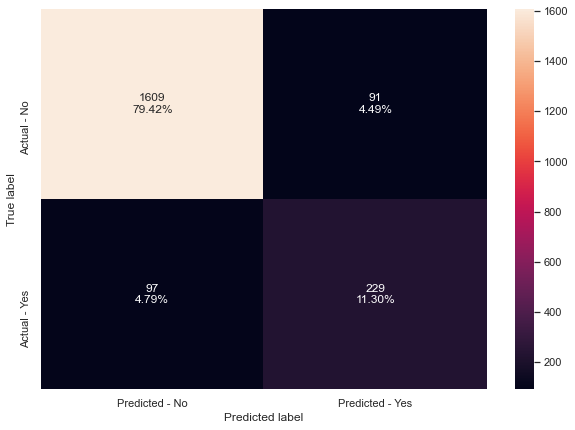

In [142]:
make_confusion_matrix(dtree,y_val)

**Confusion Matrix -**
* Customer churns and the model predicted customer churns :  True Positive (observed=1,predicted=1)
* Customer didn't churn and the model predicted customer churns : False Positive (observed=0,predicted=1)
* Customer didn't churn and the model predicted customer didn't churn : True Negative (observed=0,predicted=0)
* Customer churns and the model predicted customer didn't churn : False Negative (observed=1,predicted=0)

In [143]:
num_folds = 10
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = dtree
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
print(results)
print("F1 Score: %.3f%% (%.3f%%)" % (np.nanmean(results)*100.0, np.nanstd(results)*100.0))

[0.67021277 0.70786517 0.73239437 0.68041237 0.70588235 0.70212766
 0.68965517 0.71875    0.70652174 0.62921348]
F1 Score: 69.430% (2.758%)


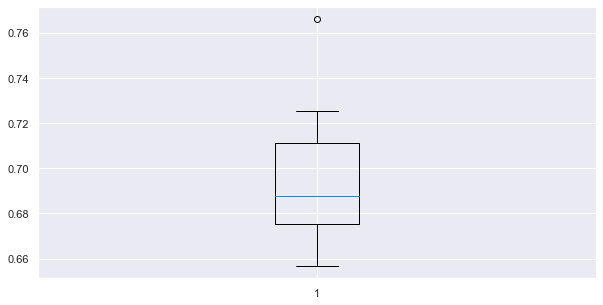

In [144]:
scoring='f1'
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)     #Setting number of splits equal to 10
cv_result_bfr=cross_val_score(estimator=dtree, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [145]:
#Using above defined function to get accuracy, recall, precision and f1 score on train and val set
dtree_score=get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on validation set :  0.9072063178677197
Recall on training set :  1.0
Recall on validation set :  0.7024539877300614
Precision on training set :  1.0
Precision on validation set :  0.715625
f1 score on training set :  1.0
f1 score on validation set :  0.7089783281733747


**Observations**
- Decision tree is working well on the training data but is not able to generalize well on the validation data. 
- This is so as well for the f1 score (train data: **100%** ; val data: **70.90%**). The gap is **29.10%** points. 
- Based on KFold, it would center at **69.430%** +- **2.758%**.
- Based on StratifiedKFold. it would range between **~66%** to **~76%**.
- In fact this is a sign of overfitting.

## Build Bagging Classifier Model

In [146]:
#base_estimator for bagging classifier is a decision tree by default
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0:0.16,1:0.84},random_state=1),random_state=42)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.16,
                                                                      1: 0.84},
                                                        random_state=1),
                  random_state=42)

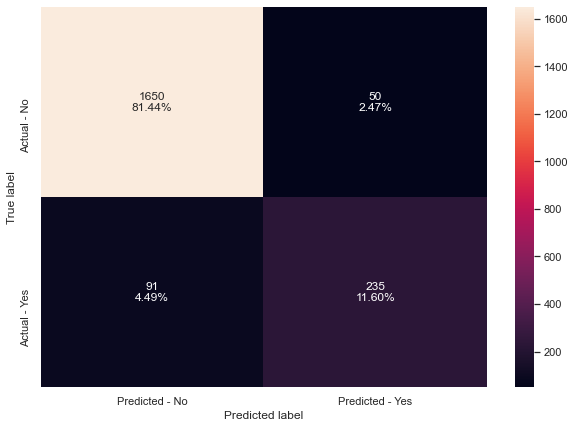

In [147]:
make_confusion_matrix(bagging,y_val)

In [148]:
num_folds = 10
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = bagging
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
print(results)
print("F1 Score: %.3f%% (%.3f%%)" % (np.nanmean(results)*100.0, np.nanstd(results)*100.0))

[0.69461078 0.71005917 0.76616915 0.74736842 0.71052632 0.76646707
 0.77248677 0.68263473 0.7672956  0.72      ]
F1 Score: 73.376% (3.220%)


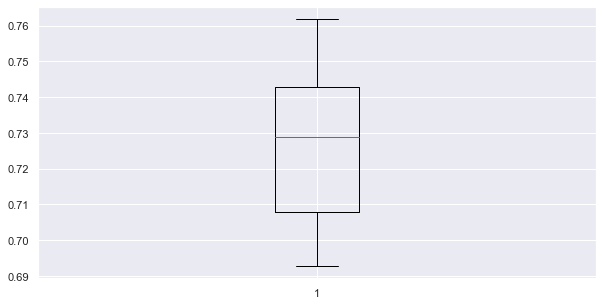

In [149]:
scoring='f1'
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)     #Setting number of splits equal to 10
cv_result_bfr=cross_val_score(estimator=bagging, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [150]:
bagging_score=get_metrics_score(bagging)

Accuracy on training set :  0.9937448559670782
Accuracy on validation set :  0.9304047384007897
Recall on training set :  0.9610655737704918
Recall on validation set :  0.7208588957055214
Precision on training set :  1.0
Precision on validation set :  0.8245614035087719
f1 score on training set :  0.9801462904911181
f1 score on validation set :  0.7692307692307692


**Observations**
- Bagging classifier is still overfitting on the training set and is not generalizing well on the validation data. 
- This is so as well for the f1 score (train data: **98.01%** ; val data: **76.92%**). The gap is **21.09%** points.
- Based on KFold, it would center at **73.376%** +- **3.220%**.
- Based on StratifiedKFold. it would range between **~69%** to **~76%**.
- It is a slight improvement over the initial lone decision tree.

## Build Random Forest Model

In [151]:
rf = RandomForestClassifier(class_weight={0:0.16,1:0.84},random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.16, 1: 0.84}, random_state=42)

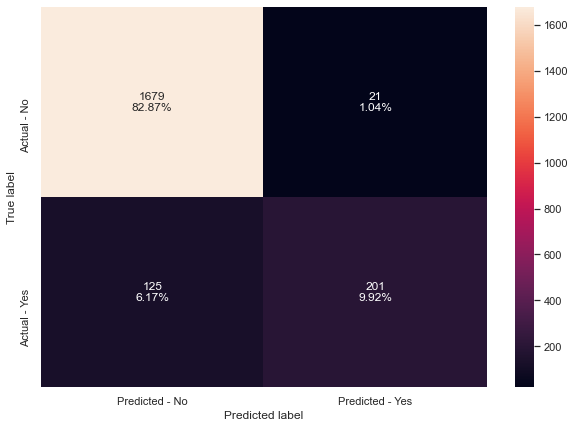

In [152]:
make_confusion_matrix(rf,y_val)

In [153]:
num_folds = 10
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = rf
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
print(results)
print("F1 Score: %.3f%% (%.3f%%)" % (np.nanmean(results)*100.0, np.nanstd(results)*100.0))

[0.71523179 0.67532468 0.70056497 0.70658683 0.71014493 0.68421053
 0.6746988  0.66666667 0.66206897 0.62666667]
F1 Score: 68.222% (2.577%)


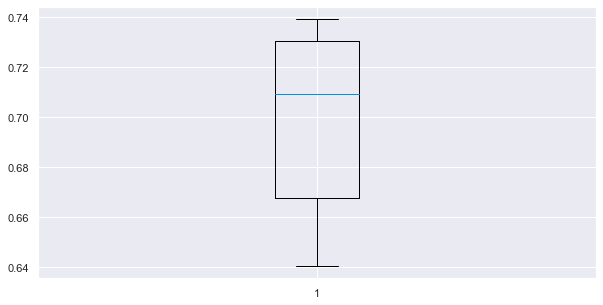

In [154]:
scoring='f1'
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)     #Setting number of splits equal to 10
cv_result_bfr=cross_val_score(estimator=rf, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [155]:
rf_score=get_metrics_score(rf)

Accuracy on training set :  0.9998353909465021
Accuracy on validation set :  0.9279368213228035
Recall on training set :  0.9989754098360656
Recall on validation set :  0.6165644171779141
Precision on training set :  1.0
Precision on validation set :  0.9054054054054054
f1 score on training set :  0.9994874423372629
f1 score on validation set :  0.7335766423357662


**Observations**
- Random Forest classifier is still overfitting on the training set and is not generalizing well on the validation data. 
- This is so as well for the f1 score (train data: **99.95%** ; val data: **73.36%**). The gap is **26.59%** points.
- Based on KFold, it would center at **68.222%** +- **2.577%**.
- Based on StratifiedKFold. it would range between **~64%** to **~74%**.
- It does not do as well as the bagging classifier.

# Model building - Ada Boost, Gradient Boost & XG Boost
## Checking train and test sets

In [156]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(6075, 43) (2026, 43) (2026, 43) (6075,) (2026,) (2026,)


In [157]:
Y.value_counts(1) # test the ratio of 1s to 0s

0    0.83934
1    0.16066
Name: Attrition_Flag, dtype: float64

In [158]:
y_train.value_counts(1) # test the ratio of 1s to 0s

0    0.839342
1    0.160658
Name: Attrition_Flag, dtype: float64

In [159]:
y_val.value_counts(1) # test the ratio of 1s to 0s

0    0.839092
1    0.160908
Name: Attrition_Flag, dtype: float64

In [160]:
y_test.value_counts(1) # test the ratio of 1s to 0s

0    0.839585
1    0.160415
Name: Attrition_Flag, dtype: float64

## Build AdaBoost Classifier Model

Accuracy on training set :  0.9295473251028806
Accuracy on validation set :  0.9210266535044422
Recall on training set :  0.6864754098360656
Recall on validation set :  0.6748466257668712
Precision on training set :  0.8459595959595959
Precision on validation set :  0.8029197080291971
f1 score on training set :  0.7579185520361991
f1 score on validation set :  0.7333333333333333


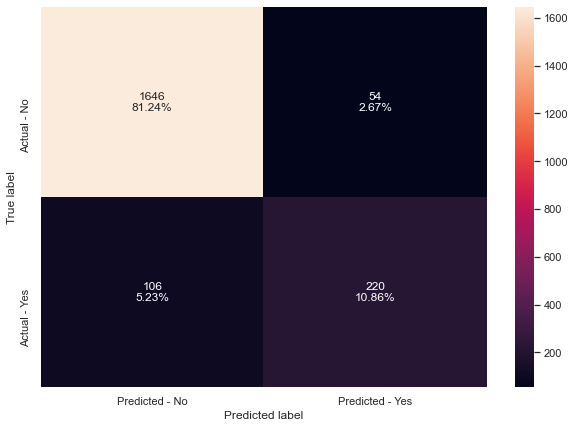

In [161]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=42)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_val)

In [162]:
num_folds = 10
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = ab_classifier
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
print(results)
print("F1 Score: %.3f%% (%.3f%%)" % (np.nanmean(results)*100.0, np.nanstd(results)*100.0))

[0.73417722 0.75581395 0.83417085 0.70588235 0.73493976 0.76136364
 0.7715736  0.73988439 0.69047619 0.70588235]
F1 Score: 74.342% (3.911%)


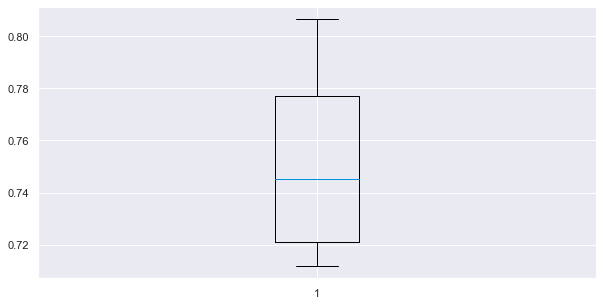

In [163]:
scoring='f1'
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)     #Setting number of splits equal to 10
cv_result_bfr=cross_val_score(estimator=ab_classifier, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

**Observations**
- Adaboost is giving more generalized performance than previous models but the validation f1-score is not ideal.
- F1 score is at (train data: **75.79%** ; val data: **73.33%**). The gap is **2.46%** points.
- Based on KFold, it would center at **74.342%** +- **3.911%**.
- Based on StratifiedKFold. it would range between **~71%** to **~81%**.
- It generalizes and performs better than the bagging techniques.

## Build Gradient Boosting Classifier Model

Accuracy on training set :  0.9562139917695474
Accuracy on validation set :  0.9397828232971372
Recall on training set :  0.7889344262295082
Recall on validation set :  0.745398773006135
Precision on training set :  0.927710843373494
Precision on validation set :  0.8617021276595744
f1 score on training set :  0.8527131782945736
f1 score on validation set :  0.7993421052631579


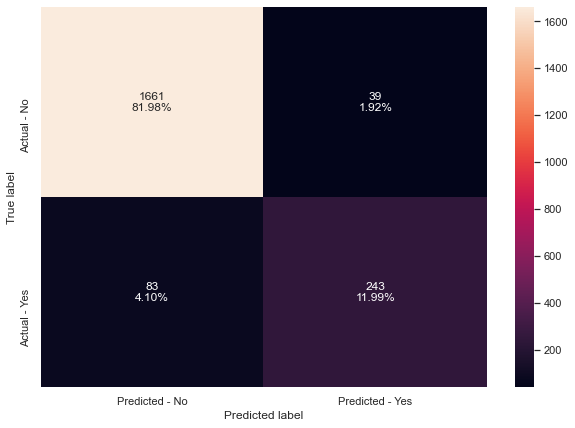

In [164]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_val)

In [165]:
num_folds = 10
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = gb_classifier
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
print(results)
print("F1 Score: %.3f%% (%.3f%%)" % (np.nanmean(results)*100.0, np.nanstd(results)*100.0))

[0.79041916 0.81176471 0.85853659 0.76842105 0.80722892 0.80924855
 0.83       0.8021978  0.80473373 0.72189349]
F1 Score: 80.044% (3.438%)


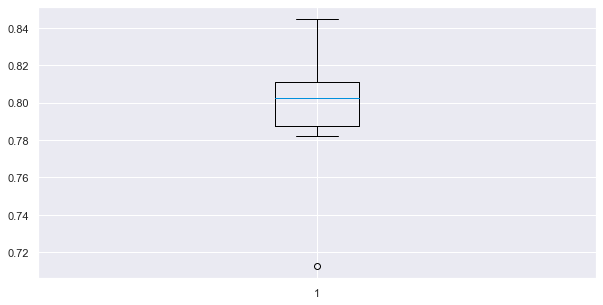

In [166]:
scoring='f1'
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)     #Setting number of splits equal to 10
cv_result_bfr=cross_val_score(estimator=gb_classifier, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

**Observations**
- The Gradient Boosting model displays generalized performance at a more ideal f1-score.
- F1 score is at (train data: **85.27%** ; val data: **79.93%**). The gap is **5.34%** points.
- Based on KFold, it would center at **80.044%** +- **3.438%**.
- Based on StratifiedKFold. it would range between **~72%** to **~84%**.
- It generalizes slightly less than the Ada Boost model but achieves higher f1-scores.

## Build XGBoost Classifier Model

Accuracy on training set :  1.0
Accuracy on validation set :  0.9585389930898321
Recall on training set :  1.0
Recall on validation set :  0.8343558282208589
Precision on training set :  1.0
Precision on validation set :  0.9006622516556292
f1 score on training set :  1.0
f1 score on validation set :  0.8662420382165604


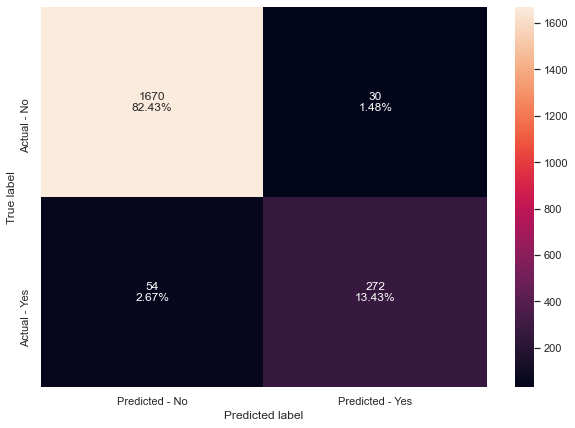

In [167]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_val)

In [168]:
num_folds = 10
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = xgb_classifier
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
print(results)

[0.83236994 0.82872928 0.85849057 0.84693878 0.86227545 0.86363636
 0.84158416 0.83076923 0.80239521 0.81111111]


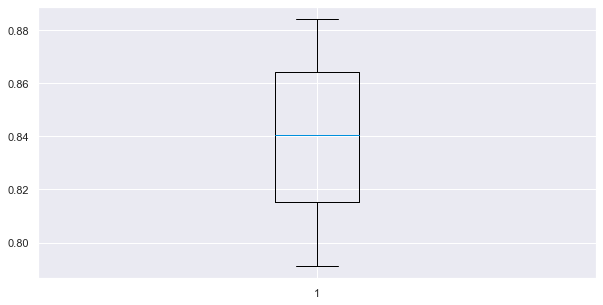

In [169]:
scoring='f1'
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)     #Setting number of splits equal to 10
cv_result_bfr=cross_val_score(estimator=xgb_classifier, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

**Observations**
- The XGB model is starting to overfit and all validation data metrics have improved.
- F1 score is at (train data: **100%** ; validation data: **86.62%**). The gap is **13.38%** points.
- Based on KFold, it would range from **80.24%** to **86.36%**.
- Based on StratifiedKFold. it would range between **~78%** to **~88%**.
- It generalizes least among all the Boosting models but achieves higher f1-scores.

# Hyperparameter tuning

From the results above, it can be derived that the best 3 models are all boosting algoritms. Here another sanity check is conducted to validate this conclusion.

In [170]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [171]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(class_weight={0:0.16,1:0.84},random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "BG",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0:0.16,1:0.84}
                ,random_state=1),random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(class_weight={0:0.16,1:0.84},random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(eval_metric='logloss', random_state=1)),
            ]
        ),
    )
)


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "f1"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 57.949280601590644
DTREE: 70.5682170417488
BG: 72.56812415398441
RF: 68.20100467150678
ADB: 73.31694608638249
GBM: 79.44392842923487
XGB: 84.23682801778945


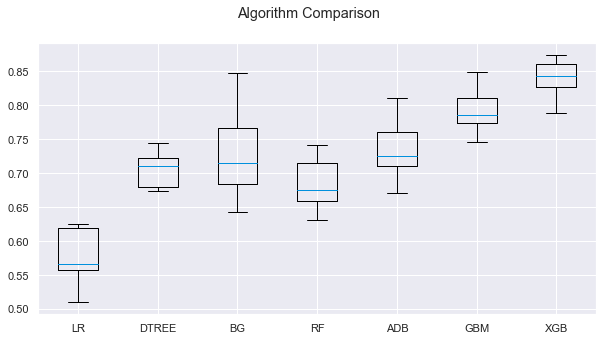

In [172]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

**Observations**
- We can see that XGBoost is giving the highest cross-validated f1-score followed by GBM and AdaBoost.
- The boxplot shows that the performance of the 3 models is consistent with just no outliers and a small range.
- We will tune models - **AdaBoost**, **GBM** and **XGBoost** and see if the performance improves. 

We will use pipelines with StandardScaler and  the boosting models and tune the model using GridSearchCV and RandomizedSearchCV. Instead of comparing the performance and time taken by these two methods - grid search and randomized search, RandomizedSearchCV will be used to cast a wide net to find best parameter space and then GridSearchCV will narrow the search to around the hyperparemeter locality pointed to be RandomizedSearchCV.

We can also use the make_pipeline function instead of Pipeline to create a pipeline.

`make_pipeline`: This is a shorthand for the Pipeline constructor; it does not require and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.

## AdaBoost

### RandomizedSearchCV

In [173]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, 
             random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8154909860651488:
Wall time: 2min 27s


In [174]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=90,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=90,
                                    random_state=1))])

Accuracy on training set :  0.9795884773662551
Accuracy on validation set :  0.945705824284304
Recall on training set :  0.9200819672131147
Recall on validation set :  0.8128834355828221
Precision on training set :  0.951271186440678
Precision on validation set :  0.8439490445859873
f1 score on training set :  0.9354166666666667
f1 score on validation set :  0.8281250000000001


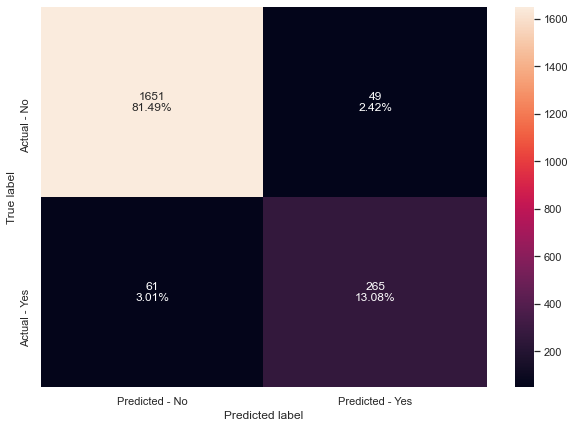

In [175]:
# Calculating different metrics
get_metrics_score(abc_tuned2)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_val)

**Observations**
- The tuned AdaBoost model f1-scoring is quite high and seems to have a good fit for both train and validation data.
- F1 score is at (train data: **93.54%** ; validation data: **82.81%**). The gap is **10.73%** points.
- Grid Search is to be conducted to find a better hyperparameter set within this locality.
- RandomSearchCV model tuning time is 2 min 27s.

### GridSearchCV

In [176]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(88, 93, 1),
    "adaboostclassifier__learning_rate": [0.9, 0.95, 1, 1.05, 1.1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1.05, 'adaboostclassifier__n_estimators': 91} 
Score: 0.829520540087341
Wall time: 1min 40s


In [177]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=91,
        learning_rate=1.05,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1.05, n_estimators=91,
                                    random_state=1))])

Accuracy on training set :  0.9797530864197531
Accuracy on validation set :  0.9437314906219151
Recall on training set :  0.923155737704918
Recall on validation set :  0.7975460122699386
Precision on training set :  0.9494204425711275
Precision on validation set :  0.8441558441558441
f1 score on training set :  0.9361038961038961
f1 score on validation set :  0.8201892744479494


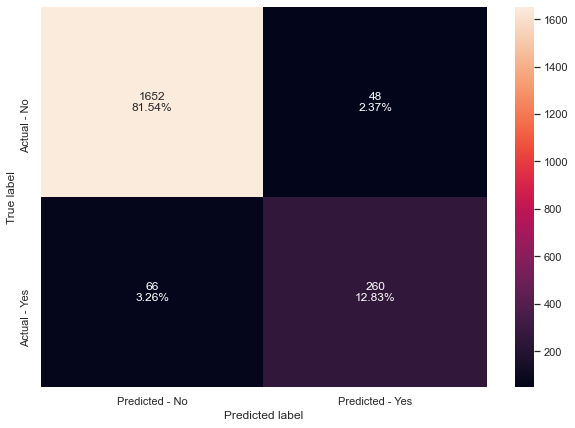

In [178]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_val)

**Observations**
- After GridSearchCV following RandomSearchCV for hyperparameter tuning, it is possible to use both methods together fairly quickly to come to a refined best set of hyperparameters. 
- RandomSearchCV being fast will do a wide search while GridSearchCV being merticulous and time consuming, will search in a narrow hyperparameter space pointed by RandomSearchCV so as to search more efficiently. 
- The tuned AdaBoost model seems to have a good fit for both train and validation data though the score largely stayed similar.
- F1 score is at (train data: **93.61%** ; validation data: **82.02%**). The gap is **11.59%** points.
- The CV score is **82.95%**, better than the initial RandomSearchCV score of **81.55%**.
- GridSearchCV model tuning time is 1 min 40s, although shorter than the RandomSearchCV of 2 min 27s, it is searching in a smaller hyperparameter space.

## XGBoost

### RandomizedSearchCV

In [179]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(eval_metric='logloss', random_state=1))

#Parameter grid to pass in RandomizedSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5,
                random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 1, 'xgbclassifier__scale_pos_weight': 2, 'xgbclassifier__reg_lambda': 2, 'xgbclassifier__n_estimators': 150, 'xgbclassifier__max_depth': 7, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__gamma': 0} with CV score=0.8440061327561328:
Wall time: 2min 56s


In [180]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                subsample=1,
                scale_pos_weight=2,
                reg_lambda=2,
                n_estimators=150,
                max_depth=7,
                learning_rate= 0.1,
                gamma=0, eval_metric='logloss'
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=7,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=150,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=2, scale_pos_weight=2,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9988477366255144
Accuracy on validation set :  0.9575518262586377
Recall on training set :  1.0
Recall on validation set :  0.852760736196319
Precision on training set :  0.9928789420142421
Precision on validation set :  0.879746835443038
f1 score on training set :  0.9964267483409903
f1 score on validation set :  0.8660436137071651


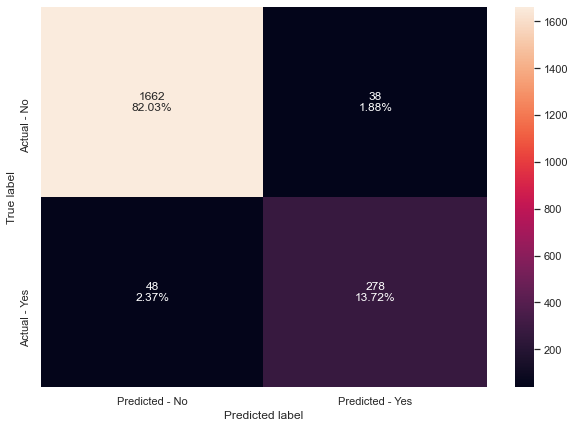

In [181]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_val)

**Observations**
- The tuned XGBoost model f1-scoring is quite high and seems to have a good fit for both train and validation data.
- F1 score is at (train data: **99.64%** ; validation data: **86.60%**). The gap is **13.04%** points.
- RandomSearchCV model tuning time is 2 min 56s.
- Grid Search is to be conducted to find a better hyperparameter set within this locality.

### GridSearchCV

In [182]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(eval_metric='logloss', random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(130,180,10),
            'xgbclassifier__scale_pos_weight':[2,3,4],
            'xgbclassifier__learning_rate':[0.08, 0.09, 0.1, 0.11, 0.12],
            'xgbclassifier__gamma':[0,2],
            'xgbclassifier__subsample':[1],
           'xgbclassifier__max_depth':[7],
            'xgbclassifier__reg_lambda':[2,3,4]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.11, 'xgbclassifier__max_depth': 7, 'xgbclassifier__n_estimators': 170, 'xgbclassifier__reg_lambda': 2, 'xgbclassifier__scale_pos_weight': 3, 'xgbclassifier__subsample': 1} with CV score=0.8486323930717088:
Wall time: 25min 50s


In [183]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        subsample=1,
        scale_pos_weight=3,
        reg_lambda=2,
        n_estimators=170,
        max_depth=7,
        learning_rate= 0.11,
        gamma=0, eval_metric='logloss'
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.11,
                               max_delta_step=0, max_depth=7,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=170,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=2, scale_pos_weight=3,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9991769547325103
Accuracy on validation set :  0.9511352418558736
Recall on training set :  1.0
Recall on validation set :  0.8619631901840491
Precision on training set :  0.9949031600407747
Precision on validation set :  0.8388059701492537
f1 score on training set :  0.9974450689831375
f1 score on validation set :  0.8502269288956127


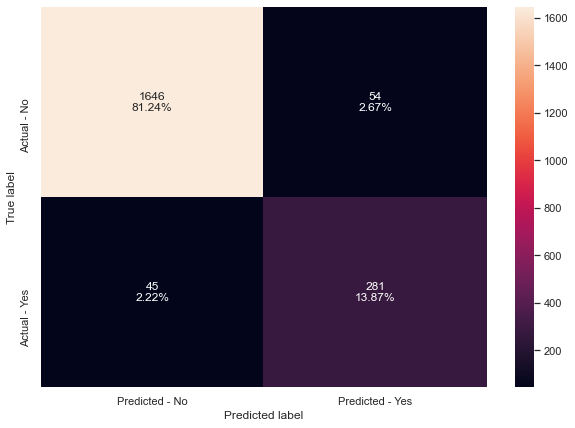

In [184]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_val)

**Observations**
- After GridSearchCV following RandomSearchCV for hyperparameter tuning, it is possible to use both methods together fairly quickly to come to a refined best set of hyperparameters although this GridSearchCV lasted much longer than the RandomSearchCV due to the 270 models needed to run.
- RandomSearchCV being fast will do a wide search while GridSearchCV being merticulous and time consuming, will search in a narrow hyperparameter space pointed by RandomSearchCV so as to search more efficiently. 
- The tuned XGBoost model seems to have a good fit for both train and validation data though the score largely stayed similar with the model after RandomsearchCV slightly better.
- F1 score is at (train data: **99.74%** ; validation data: **85.02%**). The gap is **14.72%** points.
- The CV score is **84.86%**, better than the initial RandomSearchCV score of **84.40%**.
- GridSearchCV model tuning time is 25 min 50s is now much longer than the RandomSearchCV timing of 2 min 56s, it is fitting and evaluating more model combinations now due to the higher number of set features.

## Gradient Boosting (GBM)

### RandomizedSearchCV

In [195]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=1))

#Parameter grid to pass in RandomizedSearchCV
param_grid={
    'gradientboostingclassifier__n_estimators':np.arange(100, 300, 50),
    'gradientboostingclassifier__subsample':[0.8,0.9,1],
    'gradientboostingclassifier__max_features':[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
gbm_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5,
                random_state=1)

#Fitting parameters in RandomizedSearchCV
gbm_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(gbm_cv.best_params_,gbm_cv.best_score_))

Best parameters are {'gradientboostingclassifier__subsample': 0.8, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__max_features': 0.9} with CV score=0.8283556450778942:
Wall time: 4min 25s


In [186]:
# Creating new pipeline with best parameters
gb_tuned2 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        n_estimators=250,
        subsample=0.8,
        max_features=0.9,
        random_state=1,
    ),
)

# Fit the model on training data
gb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=0.9, n_estimators=250,
                                            random_state=1, subsample=0.8))])

Accuracy on training set :  0.9777777777777777
Accuracy on validation set :  0.9540967423494571
Recall on training set :  0.9016393442622951
Recall on validation set :  0.8159509202453987
Precision on training set :  0.9575625680087051
Precision on validation set :  0.8896321070234113
f1 score on training set :  0.9287598944591029
f1 score on validation set :  0.8512


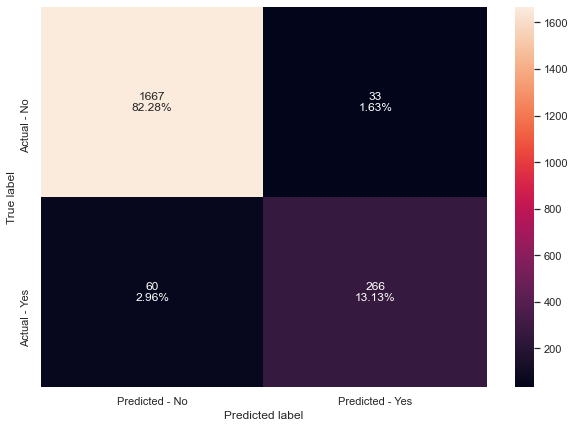

In [187]:
# Calculating different metrics
get_metrics_score(gb_tuned2)

# Creating confusion matrix
make_confusion_matrix(gb_tuned2, y_val)

**Observations**
- The tuned GBM model f1-scoring is quite high and seems to have a good fit for both train and validation data.
- F1 score is at (train data: **92.88%** ; validation data: **85.12%**). The gap is **7.76%** points.
- Grid Search is to be conducted to find a better hyperparameter set within this locality.
- RandomSearchCV model tuning time is 4 min 25s.

### GridSearchCV

In [188]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid={
    'gradientboostingclassifier__n_estimators':np.arange(240, 270, 10),
    'gradientboostingclassifier__subsample':[0.6,0.7,0.8],
    'gradientboostingclassifier__max_features':[0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__max_features': 0.9, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__subsample': 0.7} 
Score: 0.8298192641699826
Wall time: 23.7 s


In [189]:
# Creating new pipeline with best parameters
gb_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        n_estimators=250,
        subsample=0.7,
        max_features=0.9,
        random_state=1,
    ),
)

# Fit the model on training data
gb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=0.9, n_estimators=250,
                                            random_state=1, subsample=0.7))])

Accuracy on training set :  0.9767901234567902
Accuracy on validation set :  0.9511352418558736
Recall on training set :  0.8975409836065574
Recall on validation set :  0.8098159509202454
Precision on training set :  0.955288985823337
Precision on validation set :  0.8770764119601329
f1 score on training set :  0.925515055467512
f1 score on validation set :  0.8421052631578947


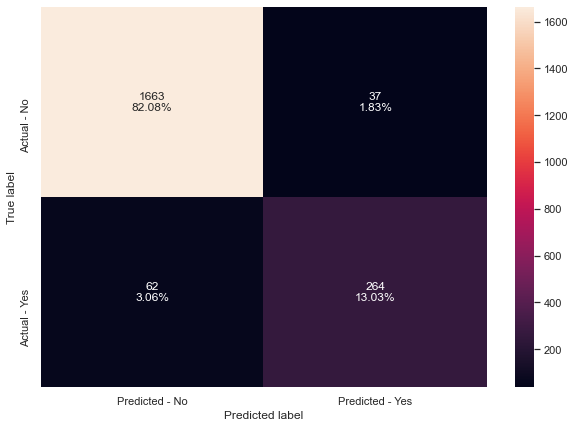

In [190]:
# Calculating different metrics
get_metrics_score(gb_tuned1)

# Creating confusion matrix
make_confusion_matrix(gb_tuned1, y_val)

**Observations**
- After GridSearchCV following RandomSearchCV for hyperparameter tuning, it is possible to use both methods together fairly quickly to come to a refined best set of hyperparameters. In this case, RandomSearchCV took 5 min and is longer as GridSearchCV goes through a smaller hyperparameter space.
- RandomSearchCV being fast will do a wide search while GridSearchCV being merticulous and time consuming, will search in a narrow hyperparameter space pointed by RandomSearchCV so as to search more efficiently. 
- The tuned GBM model seems to have a good fit for both train and validation data though the score largely stayed similar with the model after RandomsearchCV having a smaller gap between train and validation score.
- F1 score is at (train data: **92.55%** ; validation data: **84.21%**). The gap is **8.34%** points.
- The CV score is **82.98%**, better than the initial RandomSearchCV score of **82.84%**.
- GridSearchCV model tuning time is 23.7s, far less than the RandomSearchCV of 4 min 25s, as it is searching in a smaller hyperparameter space with less variable features to work through.

## Comparing all models

The metrics for the final  hypertuned models will be evaluated against the test dataset, an unseen dataset until now.

In [191]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #F1 of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("f1 score on training set : ",metrics.f1_score(y_train,pred_train))
        print("f1 score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [192]:
# defining list of models
models = [lr, log_reg_over, lr_estimator, log_reg_under, dtree, bagging, rf, ab_classifier, gb_classifier, 
          xgb_classifier, abc_tuned2, abc_tuned1, xgb_tuned2, xgb_tuned1, gb_tuned2, gb_tuned1]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall, Precision and F1
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [193]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression', 'Logistic Regression Oversampling', 
                                          'Logistic Regression Regularization', 'Logistic Regression Undersampling',
                                          'Decision Tree', 'Bagging', 'Random Forest', 'AdaBoost', 'Gradient Boost',
                                          'XG Boost', 'AdaBoost RandomSearchCV','AdaBoost GridSearchCV',
                                          'XGBoost RandomSearchCV', 'XGBoost GridSearchCV', 'GradientBoost RandomSearchCV',
                                          'GradientBoost GridSearchCV'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
13                XGBoost GridSearchCV        0.999177       0.961007   
9                             XG Boost        1.000000       0.961500   
12              XGBoost RandomSearchCV        0.998848       0.958539   
15          GradientBoost GridSearchCV        0.976790       0.955577   
14        GradientBoost RandomSearchCV        0.977778       0.955577   
10             AdaBoost RandomSearchCV        0.979588       0.950642   
11               AdaBoost GridSearchCV        0.979753       0.950642   
8                       Gradient Boost        0.956214       0.942744   
5                              Bagging        0.993745       0.933860   
7                             AdaBoost        0.929547       0.924975   
4                        Decision Tree        1.000000       0.913623   
6                        Random Forest        0.999835       0.924482   
0                  Logistic Regression        0.880988       0.878578   
2   Logistic Regression Regularization        0.747325       0.735933   
3    Logistic Regression Undersampling        0.690206       0.669793   
1     Logistic Regression Oversampling        0.804609       0.801086   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
13      1.000000     0.876923         0.994903        0.879630   
9       1.000000     0.840000         1.000000        0.913043   
12      1.000000     0.864615         0.992879        0.875389   
15      0.897541     0.815385         0.955289        0.898305   
14      0.901639     0.812308         0.957563        0.901024   
10      0.920082     0.812308         0.951271        0.871287   
11      0.923156     0.809231         0.949420        0.873754   
8       0.788934     0.738462         0.927711        0.885609   
5       0.961066     0.698462         1.000000        0.863118   
7       0.686475     0.670769         0.845960        0.828897   
4       1.000000     0.713846         1.000000        0.738854   
6       0.998975     0.563077         1.000000        0.943299   
0       0.347336     0.323077         0.797647        0.801527   
2       0.613730     0.593846         0.340922        0.323826   
3       0.676230     0.646154         0.296496        0.274869   
1       0.311475     0.310769         0.371184        0.360714   

    Train_F1-Score  Test_F1-Score  
13        0.997445       0.878274  
9         1.000000       0.875000  
12        0.996427       0.869969  
15        0.925515       0.854839  
14        0.928760       0.854369  
10        0.935417       0.840764  
11        0.936104       0.840256  
8         0.852713       0.805369  
5         0.980146       0.772109  
7         0.757919       0.741497  
4         1.000000       0.726135  
6         0.999487       0.705202  
0         0.483940       0.460526  
2         0.438346       0.419110  
3         0.412242       0.385675  
1         0.338719       0.333884

**Observations**
- The top 3 models by f1-score posed a tendency to drift to overfitting even though their f1-scores on test data, which is unseen data till the evaluation now, are about **87%**.
- THe 4th model by ranking ,'GradientBoost GridSearchCV', offers better model stability with **85.48%** score on test data and just **92.55%** on training data. This model will generalize well given its training and testing scores are quite high and are quite close to each other at **7.07%** points.

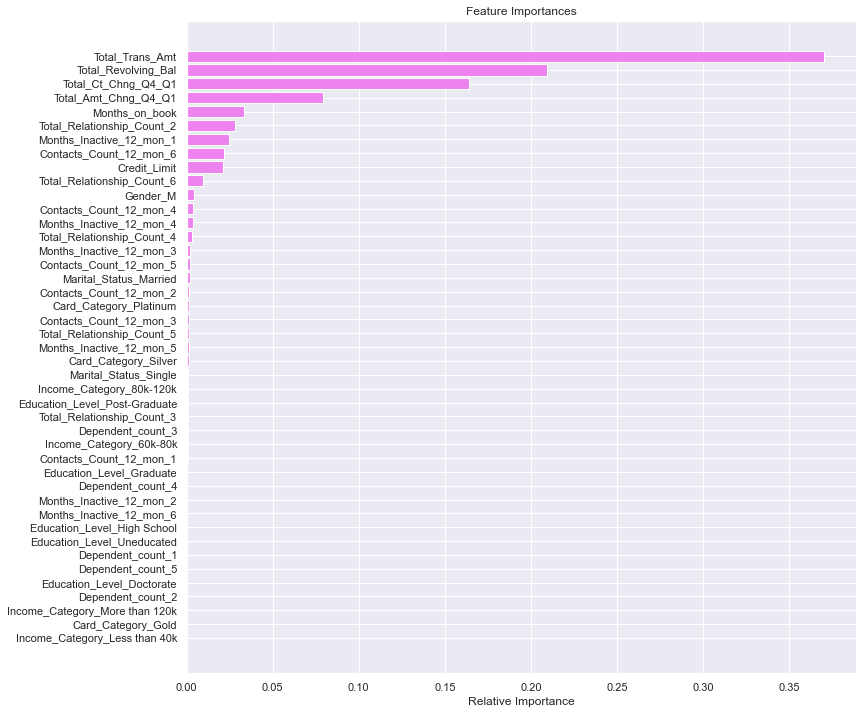

In [194]:
feature_names = X_train.columns
importances = gb_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**
- In the GradientBoost GridSearchCV model, it can be seen that Total_Trans_Amt variable is the most important in determining customer churn followed Total_Revolving_Bal and Total_Ct_Chng_Q4_Q1. What this means is total card expenditure, total card balance brought over from one month to the next and change in transaction count will give clear indication whether an individual customer will churn.

# Business Insights and Recommendations

- Our analysis shows that customers in danger of attrition exhibited lower transaction amounts on their cards than other customers in the last 12 months. The bank can look into extending low usage card holders with merchant tie up discounts, fee waivers or rebates to encourage more spending with the bank's cards.

- Customers with less credit balance per month to roll over in Total_Revolving_Bal are more likely to churn. The bank can consider extending lower interest or interest free offers to customers with good credit to entice them to stay on.

- Customers who showed a much lower ratio of spending and transactions in Q1 compared to last year Q4 tend to be churned. Customers who exhibited this behavior should be actively engaged to retain them either with spending rebates or discounts.

- Customers are less likely to be churned when they have 3 or more product services with the bank. The bank can look into cross selling more products to existing customers to lower the chance of customers churning.

- Customers were also found to be more likely to churn and increasing starting from 0 – 4 months of inactivity. The bank can consider offering incentives to encourage customer utilizing their card services again. There is a one off anomaly of a higher ratio of attrition among customers with no months of inactivity. The suspicion is likely from a competitor's promotion campaign and the bank should look at how to retain and attract customers into its card services.

- Customers who raised more issues with the bank through more contacts are more likely to leave indicating unhappiness with the services. The bank should look into improving its card services to improve customer satisfaction through analyzing customer feedback thus mitigating the risk of customer attrition.

**Comments on additional data sources for model improvement**
- Additional data can be obtained from measured feedback of the data set a few months later, after corrective actions have been taken, in order to evaluate and strengthen the model in production.

- Qualitative customer complaints can be grouped and analyzed to further target customer pain points and aspirations.

**Model implementation in real world and potential business benefits from model**
- The model implemented in the real world will help to reduce the cost of customer attrition and marketing efforts to attract new customers. Done right, the bank can target and intervene the right customer segments before customers decide to leave the bank’s card services This will increase revenue and reduce both variable marketing costs and opportunity costs.

**Other Recommendations**
- Platinum card holders have the highest attrition rate among card categories. Though small in numbers, they can represent higher profit margin product stream for the bank and their customer base should be expanded and existing customers be interviewed to remove any concerns on the product.

- A significant majority of customers are with the blue card of the bank instead of signing up on other card categories. The bank should explore expanding and retaining the customer base into these other card categories that can help in raising revenue and profit margin.